In [1]:
import uproot
import numpy as np
import pandas as pd
import awkward as ak
import vector
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Trees for dR < 0.4 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4_new.root') as og_file:
    reco_tree04 = og_file['reco'].arrays()
    parton_tree04 = og_file['parton'].arrays()

# Trees for dR < 0.6 cut matching
with uproot.open('/data/jchishol/mc16e/mntuple_ttbar_0_parton_ejets_fixed+match0d4.root') as og_file:
    reco_tree06 = og_file['reco'].arrays()
    parton_tree06 = og_file['parton'].arrays()

In [3]:
# Matching info for dR < 0.4 cut
match_data04 = np.array(np.load('/data/jchishol/mc16e/matching_info/matching_info_0_parton_ejets0d4_new.npy'))
event_indices04 = match_data04[:,0].astype(int)
best_jets04 = match_data04[:,1].astype(int)
matched_pars04 = match_data04[:,2]
dRs04 = match_data04[:,3].astype(float)
frac_delta_pts04 = match_data04[:,4].astype(float)
num_events04 = len(parton_tree04['eventNumber'])
num_matched04 = len(dRs04)

print('For new dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events04)
print('Number of matched pairs: ', num_matched04)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched04/(4*num_events04)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/num_matched04))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts04[frac_delta_pts04>-1])/(4*num_events04)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts04[frac_delta_pts04<-1])/(4*num_events04)))


# Matching info for dR < 0.46cut
match_data06 = np.array(np.load('/data/jchishol/mc16e/matching_info/matching_info_0_parton_ejets0d4.npy'))
event_indices06 = match_data06[:,0].astype(int)
best_jets06 = match_data06[:,1].astype(int)
matched_pars06 = match_data06[:,2]
dRs06 = match_data06[:,3].astype(float)
frac_delta_pts06 = match_data06[:,4].astype(float)
num_events06 = len(parton_tree06['eventNumber'])
num_matched06 = len(dRs06)

print('For old dR<0.4 matching:')
print('--------------------')
print('Total number of events: ', num_events06)
print('Number of matched pairs: ', num_matched06)
print('Percentage of matches with dR<0.4: %f%%' % (100*num_matched06/(4*num_events06)))
print('Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/num_matched06))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: %f%%' % (100*len(frac_delta_pts06[frac_delta_pts06>-1])/(4*num_events06)))
print('Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: %f%%\n' % (100*len(frac_delta_pts06[frac_delta_pts06<-1])/(4*num_events06)))

For new dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2602607
Percentage of matches with dR<0.4: 85.009400%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 99.090527%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.236263%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 0.773137%

For old dR<0.4 matching:
--------------------
Total number of events:  765388
Number of matched pairs:  2640887
Percentage of matches with dR<0.4: 86.259747%
Percentage of these successful matches (i.e. dR < 0.4) that have frac pt > -1: 98.340255%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ > -1: 84.828055%
Percentage of matches with dR<0.4 AND fractional $\Delta p_T$ < -1: 1.431692%



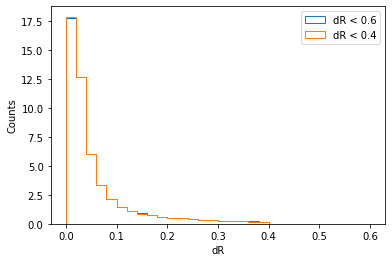

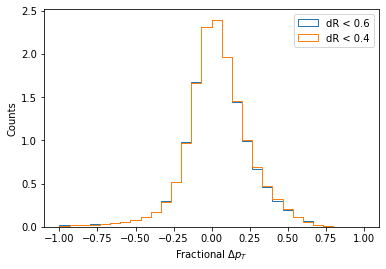

In [4]:
plt.figure('dR')
plt.hist(dRs06,bins=30,range=(0,0.6),label='dR < 0.6',density=True,histtype='step')
plt.hist(dRs04,bins=30,range=(0,0.6),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('dR')
plt.ylabel('Counts')
plt.legend()
plt.show()

plt.figure('frac_delta_pt')
plt.hist(frac_delta_pts06,bins=30,range=(-1,1),label='dR < 0.6',density=True,histtype='step')
plt.hist(frac_delta_pts04,bins=30,range=(-1,1),label='dR < 0.4',density=True,histtype='step')
plt.xlabel('Fractional $\Delta p_T$')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [6]:
# dR < 0.4 dataframes
print('For dR < 0.4 matching:')
print('----------------------')
print('All data:')
df04 = pd.DataFrame({'Event':event_indices04, 'Jet':best_jets04,'Parent': matched_pars04, 'dR':dRs04.round(3), 'frac delta pt':frac_delta_pts04.round(3)})
#df_grouped04 = df04.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df04)
print('Not great matches:')
df04_bad = df04[df04['frac delta pt']<-1]
print(df04_bad)

# dR < 0.6 dataframes
print('For dR < 0.6 matching:')
print('----------------------')
print('All data:')
df06 = pd.DataFrame({'Event':event_indices06, 'Jet':best_jets06,'Parent': matched_pars06, 'dR':dRs06.round(3), 'frac delta pt':frac_delta_pts06.round(3)})
#df_grouped06 = df06.groupby(['Event'], as_index=True).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df06)
print('Not great matches:')
df06_bad = df06[df06['frac delta pt']<-1]
print(df06_bad)


For dR < 0.4 matching:
----------------------
All data:
          Event  Jet             Parent     dR  frac delta pt
0             0    0           b_from_t  0.018         -0.147
1             0    4        b_from_tbar  0.273          0.234
2             0    2  Wdecay1_from_tbar  0.034          0.066
3             0    3  Wdecay2_from_tbar  0.018          0.012
4             1    1           b_from_t  0.031          0.005
...         ...  ...                ...    ...            ...
2602602  765386    3     Wdecay1_from_t  0.131          0.126
2602603  765386    2     Wdecay2_from_t  0.085         -0.270
2602604  765387    0           b_from_t  0.007         -0.029
2602605  765387    1        b_from_tbar  0.012          0.150
2602606  765387    4     Wdecay2_from_t  0.017         -0.249

[2602607 rows x 5 columns]
Not great matches:
          Event  Jet             Parent     dR  frac delta pt
233          72    2  Wdecay1_from_tbar  0.109         -1.347
345         105    0  Wdecay1

In [16]:
df_grouped04 = df04.groupby(['Event'], as_index=False).agg({'Jet': list,'Parent': list,'dR': list,'frac delta pt': list})
print(df_grouped04)

         Event           Jet  \
0            0  [0, 4, 2, 3]   
1            1     [1, 2, 5]   
2            2  [3, 1, 4, 0]   
3            3     [3, 1, 4]   
4            4     [1, 0, 3]   
...        ...           ...   
765292  765383     [0, 3, 1]   
765293  765384     [0, 3, 2]   
765294  765385     [1, 0, 2]   
765295  765386  [1, 0, 3, 2]   
765296  765387     [0, 1, 4]   

                                                   Parent  \
0       [b_from_t, b_from_tbar, Wdecay1_from_tbar, Wde...   
1              [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
2       [b_from_t, b_from_tbar, Wdecay1_from_tbar, Wde...   
3              [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
4              [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
...                                                   ...   
765292         [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
765293            [b_from_t, b_from_tbar, Wdecay1_from_t]   
765294            [b_from_t, b_from_tbar, Wdecay1_from_t]   
76529

In [22]:
df_grouped04['All Matched'] = df_grouped04.apply(lambda row : True if len(row['Jet'])==4 else False, axis=1)
df_notall = df_grouped04[df_grouped04['All Matched']==False]
print(df_notall)

         Event        Jet                                      Parent  \
1            1  [1, 2, 5]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
3            3  [3, 1, 4]  [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
4            4  [1, 0, 3]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
5            5  [1, 0, 2]  [b_from_t, b_from_tbar, Wdecay1_from_tbar]   
6            6  [0, 2, 3]  [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
...        ...        ...                                         ...   
765291  765382  [1, 2, 0]     [b_from_t, b_from_tbar, Wdecay2_from_t]   
765292  765383  [0, 3, 1]  [b_from_t, b_from_tbar, Wdecay2_from_tbar]   
765293  765384  [0, 3, 2]     [b_from_t, b_from_tbar, Wdecay1_from_t]   
765294  765385  [1, 0, 2]     [b_from_t, b_from_tbar, Wdecay1_from_t]   
765296  765387  [0, 1, 4]     [b_from_t, b_from_tbar, Wdecay2_from_t]   

                           dR            frac delta pt  All Matched  
1       [0.031, 0.014, 0.016]    [0.005, 0.031, 0.304

In [31]:
print('b_from_t' in df_notall[df_notall['Event']==3]['Parent'].to_list()[0])

True


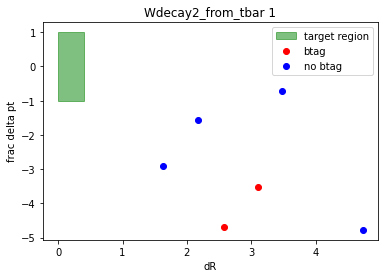

Decay product pt= 15014.2216796875
Jet pts= [8.67e+04, 8.55e+04, 6.79e+04, 5.87e+04, 3.86e+04, 2.58e+04]
Decay product phi= -0.5016816854476929
Jet phis= [2.18, -1.84, -1.71, 0.847, 0.586, -3.11]
Decay product eta= -1.6796337366104126
Jet etas= [2.21, 0.528, 1.18, -0.777, 0.203, 0.616]


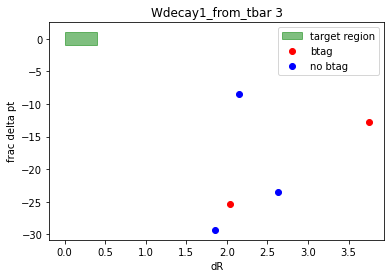

Decay product pt= 9969.443359375
Jet pts= [3.02e+05, 2.62e+05, 2.45e+05, 1.37e+05, 9.39e+04]
Decay product phi= -1.1108297109603882
Jet phis= [0.73, -0.714, -1.41, 2.92, -1.25]
Decay product eta= -1.9184693098068237
Jet etas= [-1.75, 0.0768, 0.693, 1.08, 0.223]


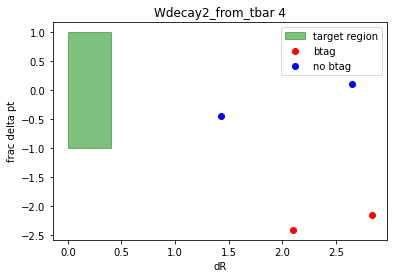

Decay product pt= 28821.451171875
Jet pts= [9.82e+04, 9.07e+04, 4.17e+04, 2.55e+04]
Decay product phi= 1.1145809888839722
Jet phis= [2.62, -0.302, 1.12, -0.993]
Decay product eta= 2.756990909576416
Jet etas= [1.29, 0.3, 1.33, 1.16]


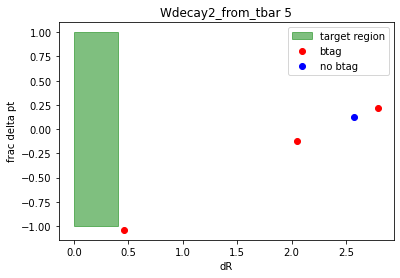

Decay product pt= 41732.65625
Jet pts= [8.51e+04, 4.68e+04, 3.64e+04, 3.27e+04]
Decay product phi= 2.3573880195617676
Jet phis= [2.77, 0.331, -0.207, -1.64]
Decay product eta= -0.3791787028312683
Jet etas= [-0.174, -0.681, -0.568, 1.23]


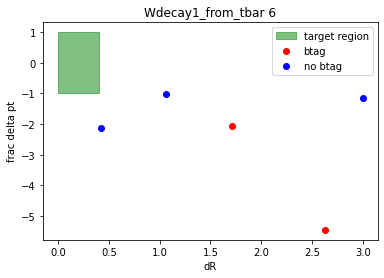

Decay product pt= 16048.5556640625
Jet pts= [1.04e+05, 5.02e+04, 4.9e+04, 3.47e+04, 3.26e+04]
Decay product phi= -0.3550095558166504
Jet phis= [-2.93, -0.106, -0.148, 3.1, 0.376]
Decay product eta= 0.5182676315307617
Jet etas= [1.07, 0.173, 2.22, 1.5, 1.29]


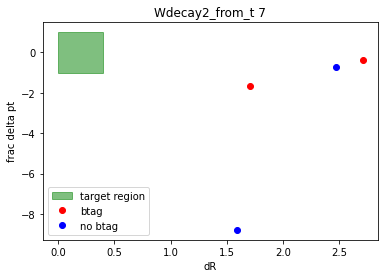

Decay product pt= 28848.4375
Jet pts= [2.82e+05, 7.64e+04, 4.99e+04, 3.89e+04]
Decay product phi= -1.803449273109436
Jet phis= [3.04, -0.363, 2.02, -0.256]
Decay product eta= 0.0
Jet etas= [-2.08, -0.493, -1.23, 0.806]


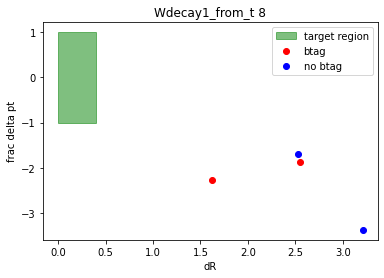

Decay product pt= 17030.232421875
Jet pts= [7.45e+04, 5.58e+04, 4.9e+04, 4.58e+04]
Decay product phi= 2.1064836978912354
Jet phis= [-0.854, 0.756, 2.5, -0.106]
Decay product eta= 0.6108186841011047
Jet etas= [-0.625, -0.278, -1.91, -0.619]


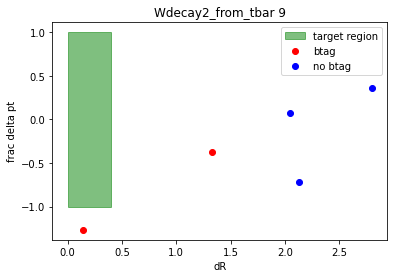

Decay product pt= 51290.81640625
Jet pts= [1.16e+05, 8.79e+04, 7.05e+04, 4.75e+04, 3.28e+04]
Decay product phi= 2.9678683280944824
Jet phis= [3.09, 1.08, -2.09, -1.74, 1.13]
Decay product eta= -1.0188400745391846
Jet etas= [-0.948, -0.0307, -0.501, 0.284, 1.09]


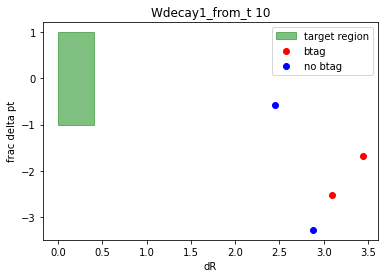

Decay product pt= 18688.83203125
Jet pts= [8e+04, 6.59e+04, 5.02e+04, 2.96e+04]
Decay product phi= -0.8539733290672302
Jet phis= [2.73, 2.79, 3.11, -3.04]
Decay product eta= 2.797386407852173
Jet etas= [1.78, 1.18, 0.258, 1.69]


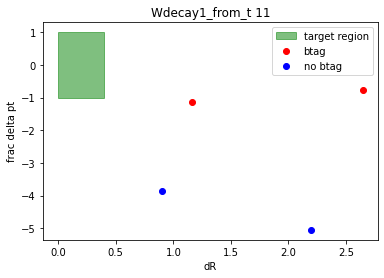

Decay product pt= 17709.658203125
Jet pts= [1.07e+05, 8.6e+04, 3.81e+04, 3.14e+04]
Decay product phi= -0.9317715167999268
Jet phis= [-2.9, -1.71, -1.58, 2.91]
Decay product eta= 0.5164305567741394
Jet etas= [-0.467, 0.971, 1.48, 1.53]


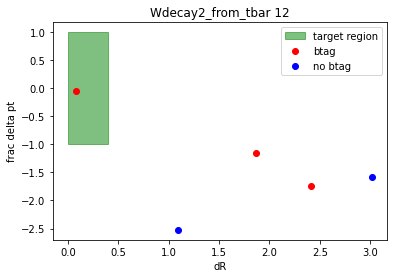

Decay product pt= 24257.630859375
Jet pts= [8.55e+04, 6.64e+04, 6.28e+04, 5.21e+04, 2.52e+04]
Decay product phi= 2.2764134407043457
Jet phis= [1.2, -2.16, -0.993, -2.15, 2.3]
Decay product eta= 0.5696427822113037
Jet etas= [0.71, -0.98, 0.753, 0.743, 0.486]


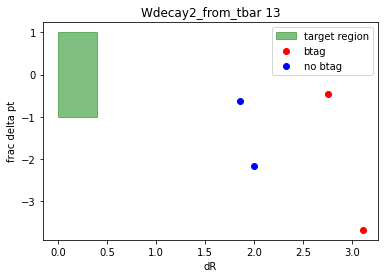

Decay product pt= 17827.080078125
Jet pts= [8.33e+04, 5.62e+04, 2.9e+04, 2.6e+04]
Decay product phi= 2.415961742401123
Jet phis= [-0.676, 2.04, -2.92, -1.17]
Decay product eta= -0.1285647749900818
Jet etas= [-0.392, -2.09, -1.72, -0.689]


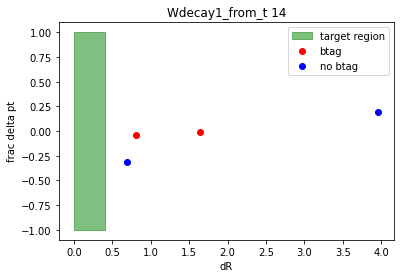

Decay product pt= 59797.578125
Jet pts= [7.82e+04, 6.22e+04, 6.05e+04, 4.8e+04]
Decay product phi= 1.4505826234817505
Jet phis= [0.798, 1.1, 3.03, -2.41]
Decay product eta= 0.660557210445404
Jet etas= [0.886, -0.0709, 0.241, -2.47]


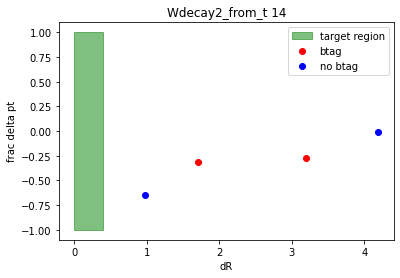

Decay product pt= 47537.03515625
Jet pts= [7.82e+04, 6.22e+04, 6.05e+04, 4.8e+04]
Decay product phi= -0.16635073721408844
Jet phis= [0.798, 1.1, 3.03, -2.41]
Decay product eta= 0.0
Jet etas= [0.886, -0.0709, 0.241, -2.47]


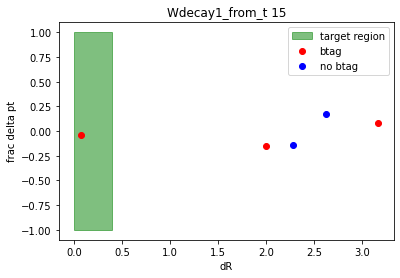

Decay product pt= 44312.1875
Jet pts= [5.09e+04, 5.06e+04, 4.63e+04, 4.05e+04, 3.65e+04]
Decay product phi= -2.421833038330078
Jet phis= [1.92, 1.83, -2.38, 0.196, 0.0983]
Decay product eta= -0.48627716302871704
Jet etas= [-0.978, -1.52, -0.552, 1.31, -1.22]


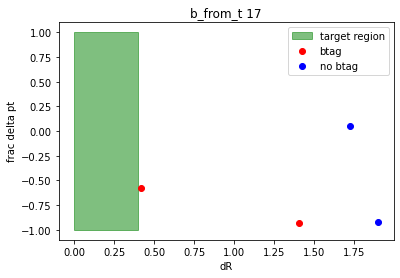

Decay product pt= 33095.26854660215
Jet pts= [6.4e+04, 6.34e+04, 5.23e+04, 3.14e+04]
Decay product phi= 3.034362080824243
Jet phis= [1.89, -1.56, 2.62, 2.91]
Decay product eta= 0.17178316007070926
Jet etas= [0.991, 1.05, 0.187, 1.89]


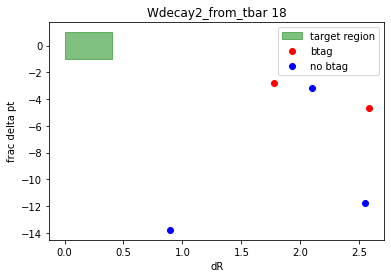

Decay product pt= 9413.4873046875
Jet pts= [1.39e+05, 1.2e+05, 5.34e+04, 3.95e+04, 3.6e+04]
Decay product phi= 2.7196693420410156
Jet phis= [1.98, -1.33, 1.78, -2.25, -1.79]
Decay product eta= 1.1618913412094116
Jet etas= [0.662, -0.0693, -1.24, -0.474, 1.23]


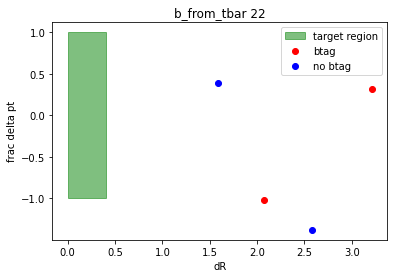

Decay product pt= 45835.35201364556
Jet pts= [1.09e+05, 9.27e+04, 3.12e+04, 2.8e+04]
Decay product phi= -2.883590225796995
Jet phis= [-2.2, 1.66, -2.34, -1.3]
Decay product eta= -0.919033717947338
Jet etas= [1.57, -2.06, 2.25, -1.03]


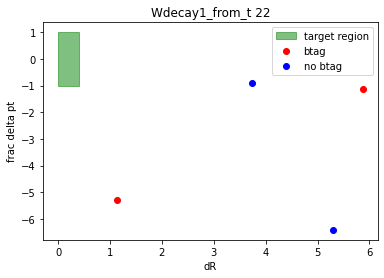

Decay product pt= 14719.208984375
Jet pts= [1.09e+05, 9.27e+04, 3.12e+04, 2.8e+04]
Decay product phi= 1.7382230758666992
Jet phis= [-2.2, 1.66, -2.34, -1.3]
Decay product eta= -3.1876060962677
Jet etas= [1.57, -2.06, 2.25, -1.03]


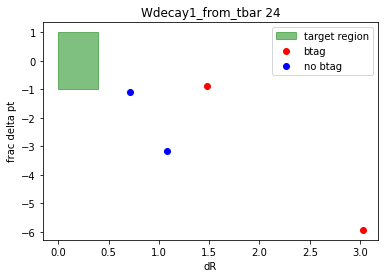

Decay product pt= 35487.06640625
Jet pts= [2.46e+05, 1.48e+05, 7.45e+04, 6.71e+04]
Decay product phi= 1.0266218185424805
Jet phis= [-1.44, 1.86, 1.25, 2.48]
Decay product eta= 0.9533711075782776
Jet etas= [-0.796, 0.26, 0.272, 1.24]


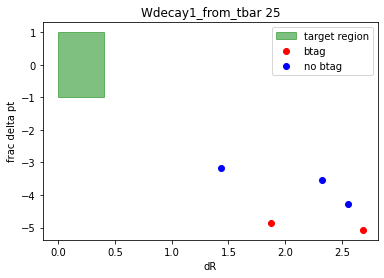

Decay product pt= 9230.2666015625
Jet pts= [5.6e+04, 5.41e+04, 4.88e+04, 4.2e+04, 3.86e+04]
Decay product phi= 2.392320156097412
Jet phis= [-1.85, 0.526, 0.35, -1.84, 1.63]
Decay product eta= -1.9554020166397095
Jet etas= [-0.215, -1.79, -0.417, -0.864, -0.741]


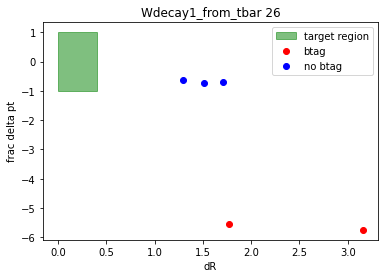

Decay product pt= 23373.908203125
Jet pts= [1.58e+05, 1.53e+05, 4.02e+04, 3.96e+04, 3.8e+04]
Decay product phi= 0.07760139554738998
Jet phis= [2.95, 0.928, 0.095, -0.622, -0.98]
Decay product eta= -0.8936379551887512
Jet etas= [0.412, 0.653, 0.614, 0.67, -1.64]


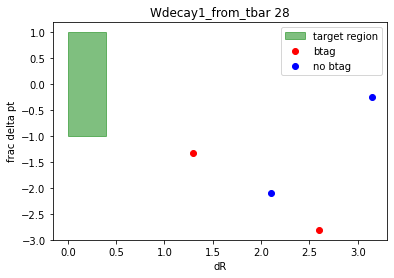

Decay product pt= 23546.666015625
Jet pts= [8.98e+04, 7.3e+04, 5.5e+04, 2.92e+04]
Decay product phi= -1.833986520767212
Jet phis= [2.49, 0.0746, -3.12, -3.05]
Decay product eta= 0.5756170153617859
Jet etas= [-1.13, 1.45, 0.718, -2.33]


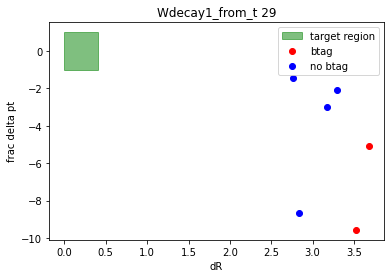

Decay product pt= 10691.134765625
Jet pts= [1.13e+05, 1.03e+05, 6.5e+04, 4.25e+04, 3.31e+04, 2.63e+04]
Decay product phi= -0.9101404547691345
Jet phis= [-1.56, 1.69, 2.57, 2.59, 1.99, 0.874]
Decay product eta= 2.884260416030884
Jet etas= [-0.579, 1.75, 0.498, 1.36, 1.31, 0.77]


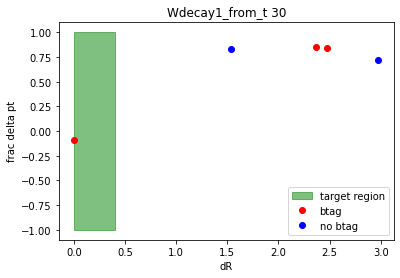

Decay product pt= 167269.609375
Jet pts= [1.82e+05, 4.72e+04, 2.8e+04, 2.74e+04, 2.51e+04]
Decay product phi= -2.124058961868286
Jet phis= [-2.13, 0.841, -2.59, 0.101, 1.91]
Decay product eta= -0.8347541093826294
Jet etas= [-0.835, -1.11, 0.63, 0.248, -0.0934]


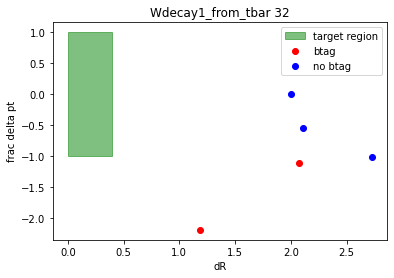

Decay product pt= 25144.212890625
Jet pts= [8.02e+04, 5.3e+04, 5.06e+04, 3.89e+04, 2.5e+04]
Decay product phi= -1.2607725858688354
Jet phis= [-0.253, 0.815, 2.56, -2.98, -2.52]
Decay product eta= 0.17711417376995087
Jet etas= [-0.454, 0.226, 1.35, -1.05, -1.37]


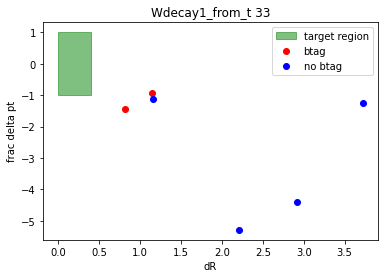

Decay product pt= 15935.47265625
Jet pts= [1e+05, 8.6e+04, 3.89e+04, 3.59e+04, 3.38e+04, 3.06e+04]
Decay product phi= 0.3845890462398529
Jet phis= [-1.61, 2.51, 1.19, -1.21, -0.129, 0.583]
Decay product eta= -1.5628759860992432
Jet etas= [-0.614, 0.441, -1.46, 1.8, -0.524, -0.437]


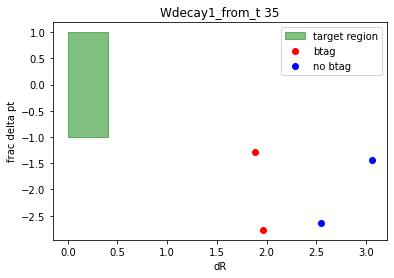

Decay product pt= 11860.0986328125
Jet pts= [4.47e+04, 4.32e+04, 2.89e+04, 2.71e+04]
Decay product phi= 3.0771126747131348
Jet phis= [-1.27, -2.16, -0.446, 1.22]
Decay product eta= -0.5354200601577759
Jet etas= [-0.19, 1.79, 0.793, -0.882]


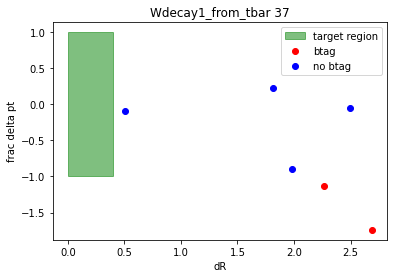

Decay product pt= 36221.26953125
Jet pts= [9.93e+04, 7.72e+04, 6.88e+04, 3.94e+04, 3.8e+04, 2.78e+04]
Decay product phi= 1.1938914060592651
Jet phis= [-2.45, 0.649, -0.324, 1.67, -2.64, 1.97]
Decay product eta= -0.15915322303771973
Jet etas= [-0.696, -2.35, 1.12, -0.328, 0.279, 1.48]


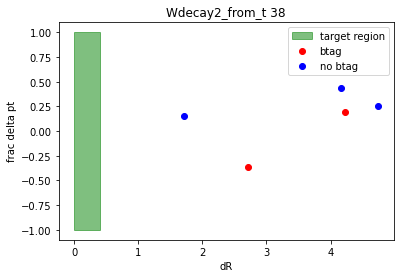

Decay product pt= 48902.8125
Jet pts= [6.69e+04, 4.14e+04, 3.96e+04, 3.63e+04, 2.75e+04]
Decay product phi= -2.1047861576080322
Jet phis= [0.395, 2.9, -0.269, 1.28, 1.58]
Decay product eta= 0.0
Jet etas= [-2.26, -2.19, 0.478, 0.434, -0.0776]


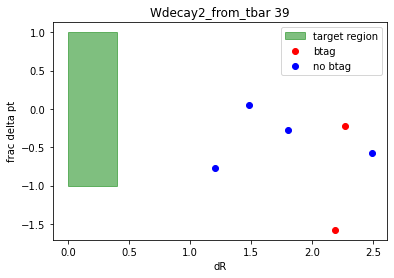

Decay product pt= 32512.775390625
Jet pts= [8.38e+04, 5.77e+04, 5.13e+04, 4.14e+04, 3.99e+04, 3.1e+04]
Decay product phi= -2.699526786804199
Jet phis= [1.82, -1.61, -0.211, -0.921, 1.37, 2.16]
Decay product eta= -0.6641612648963928
Jet etas= [-1.96, -0.158, -0.625, -0.393, -1.12, -0.275]


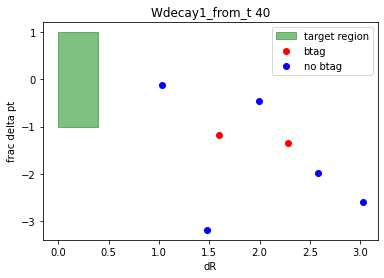

Decay product pt= 23180.03515625
Jet pts= [9.72e+04, 8.34e+04, 6.9e+04, 5.45e+04, 5.03e+04, 3.38e+04, 2.57e+04]
Decay product phi= -2.2577836513519287
Jet phis= [-2.3, 1.39, 2.77, -0.678, -1.64, -0.341, -2.56]
Decay product eta= 0.764683187007904
Jet etas= [-0.716, 2.25, -1.49, -0.88, -0.71, 0.23, 1.75]


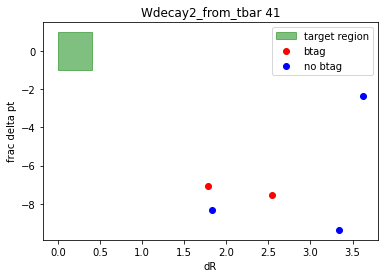

Decay product pt= 8437.81640625
Jet pts= [8.76e+04, 7.88e+04, 7.2e+04, 6.8e+04, 2.81e+04]
Decay product phi= 1.2434848546981812
Jet phis= [-1.39, 2.23, -2.83, -0.504, -2]
Decay product eta= -0.18139517307281494
Jet etas= [1.87, -1.73, 1.07, -0.497, 1.79]


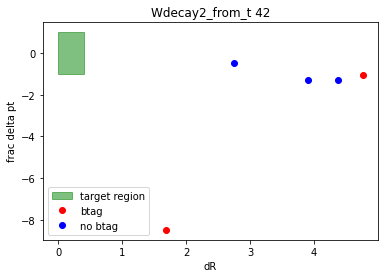

Decay product pt= 18301.05078125
Jet pts= [1.74e+05, 4.21e+04, 4.18e+04, 3.76e+04, 2.66e+04]
Decay product phi= -1.3389924764633179
Jet phis= [-0.982, 1.18, 1.29, 2.97, -2.27]
Decay product eta= 0.0
Jet etas= [-0.579, 1.34, 0.646, 2.1, 0.348]


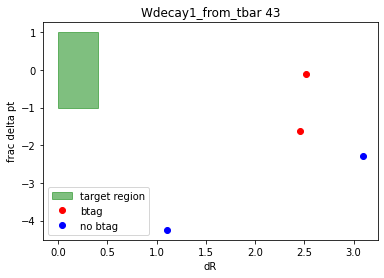

Decay product pt= 29420.451171875
Jet pts= [1.54e+05, 9.64e+04, 7.71e+04, 3.26e+04]
Decay product phi= -1.4665950536727905
Jet phis= [-1.77, 1.43, 0.825, -1.4]
Decay product eta= -0.22292597591876984
Jet etas= [0.837, -1.29, 0.659, 2.29]


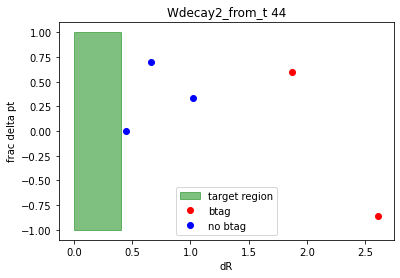

Decay product pt= 82574.515625
Jet pts= [1.53e+05, 8.23e+04, 5.46e+04, 3.34e+04, 2.52e+04]
Decay product phi= 1.850820541381836
Jet phis= [-0.505, 2.17, 2.87, 2.62, 2.04]
Decay product eta= 0.0
Jet etas= [1.06, 0.235, -0.0357, -1.79, -0.716]


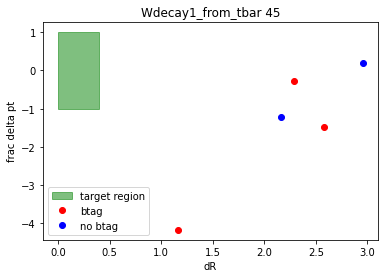

Decay product pt= 32678.900390625
Jet pts= [1.69e+05, 8.12e+04, 7.24e+04, 4.16e+04, 2.63e+04]
Decay product phi= -2.7024104595184326
Jet phis= [-1.56, 1.07, 1.54, -0.574, 1.04]
Decay product eta= 0.24072864651679993
Jet etas= [0.0221, 0.82, -0.483, -0.589, -1.26]


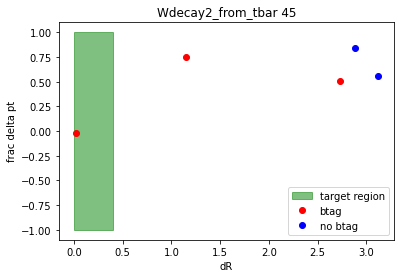

Decay product pt= 165042.484375
Jet pts= [1.69e+05, 8.12e+04, 7.24e+04, 4.16e+04, 2.63e+04]
Decay product phi= -1.542324423789978
Jet phis= [-1.56, 1.07, 1.54, -0.574, 1.04]
Decay product eta= 0.028855087235569954
Jet etas= [0.0221, 0.82, -0.483, -0.589, -1.26]


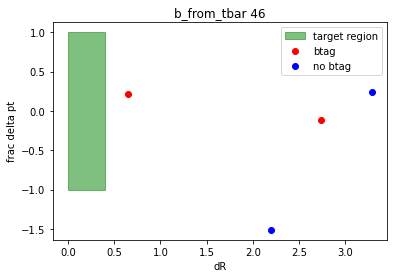

Decay product pt= 37046.97368428793
Jet pts= [9.31e+04, 4.12e+04, 2.93e+04, 2.81e+04]
Decay product phi= -1.0999006653234216
Jet phis= [0.94, 2.82, -0.879, 2.52]
Decay product eta= -1.5492777554412416
Jet etas= [-0.753, -0.158, -0.94, 0.378]


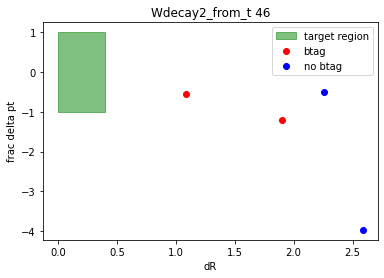

Decay product pt= 18730.15625
Jet pts= [9.31e+04, 4.12e+04, 2.93e+04, 2.81e+04]
Decay product phi= -1.5571578741073608
Jet phis= [0.94, 2.82, -0.879, 2.52]
Decay product eta= 0.0
Jet etas= [-0.753, -0.158, -0.94, 0.378]


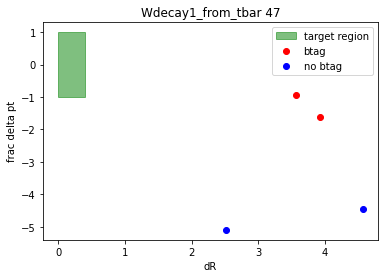

Decay product pt= 18580.869140625
Jet pts= [1.13e+05, 1.01e+05, 4.88e+04, 3.6e+04]
Decay product phi= -0.8162760138511658
Jet phis= [-2.5, 0.618, 2.26, -2.69]
Decay product eta= -4.155587196350098
Jet etas= [-2.29, 0.174, -1.72, -1.13]


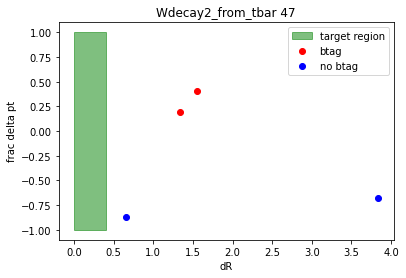

Decay product pt= 60599.69921875
Jet pts= [1.13e+05, 1.01e+05, 4.88e+04, 3.6e+04]
Decay product phi= -3.053389072418213
Jet phis= [-2.5, 0.618, 2.26, -2.69]
Decay product eta= -2.6412951946258545
Jet etas= [-2.29, 0.174, -1.72, -1.13]


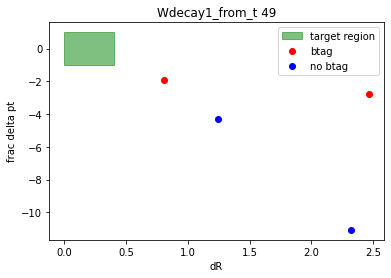

Decay product pt= 12833.2509765625
Jet pts= [1.55e+05, 6.84e+04, 4.86e+04, 3.75e+04]
Decay product phi= 1.8654870986938477
Jet phis= [-0.456, 2.04, -1.99, 1.26]
Decay product eta= -0.6366308927536011
Jet etas= [-0.636, 0.594, -1.06, -1.16]


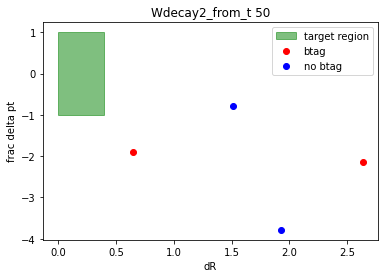

Decay product pt= 19110.091796875
Jet pts= [9.15e+04, 6e+04, 5.56e+04, 3.39e+04]
Decay product phi= -1.8478482961654663
Jet phis= [-0.728, 0.0233, -2.49, 2.93]
Decay product eta= 0.0
Jet etas= [-0.137, -0.417, 1.41, 1.34]


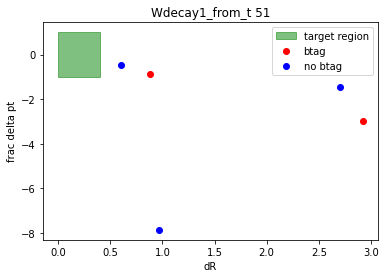

Decay product pt= 34134.5
Jet pts= [3.03e+05, 1.36e+05, 8.4e+04, 6.39e+04, 5.09e+04]
Decay product phi= 0.4548599123954773
Jet phis= [1.22, -2.45, -1.95, -0.321, 0.392]
Decay product eta= 1.0371683835983276
Jet etas= [0.436, 0.719, -0.196, 0.613, 1.63]


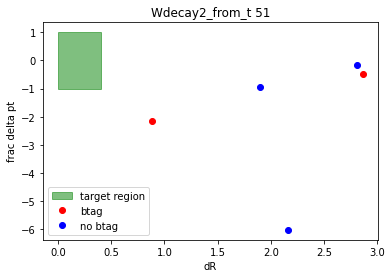

Decay product pt= 43143.52734375
Jet pts= [3.03e+05, 1.36e+05, 8.4e+04, 6.39e+04, 5.09e+04]
Decay product phi= -3.094684600830078
Jet phis= [1.22, -2.45, -1.95, -0.321, 0.392]
Decay product eta= 0.0
Jet etas= [0.436, 0.719, -0.196, 0.613, 1.63]


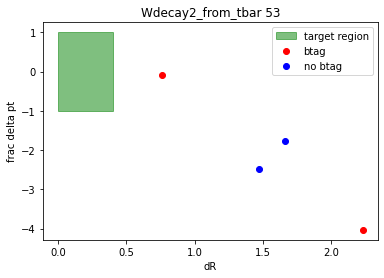

Decay product pt= 31789.76171875
Jet pts= [1.6e+05, 1.11e+05, 8.82e+04, 3.49e+04]
Decay product phi= -0.81301349401474
Jet phis= [-3.01, -0.423, -2.47, -1.47]
Decay product eta= 0.3559620976448059
Jet etas= [0.731, -1.06, 0.287, 0.738]


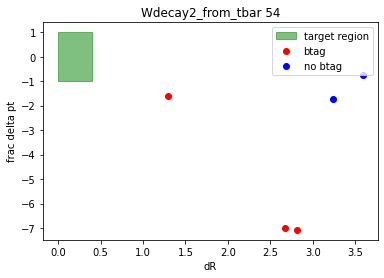

Decay product pt= 19466.623046875
Jet pts= [1.57e+05, 1.56e+05, 5.29e+04, 5.11e+04, 3.43e+04]
Decay product phi= -0.6044014692306519
Jet phis= [0.616, -2.95, 2.48, -0.222, 2.55]
Decay product eta= -0.15567822754383087
Jet etas= [2.38, 1.14, 0.857, 1.08, 1.61]


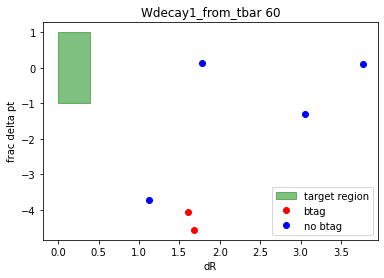

Decay product pt= 30498.95703125
Jet pts= [1.7e+05, 1.54e+05, 1.44e+05, 7.06e+04, 2.76e+04, 2.68e+04]
Decay product phi= 1.8524755239486694
Jet phis= [2.85, 0.247, 2.24, -1.73, -2.43, -2.72]
Decay product eta= -0.908882200717926
Jet etas= [0.447, -0.955, 0.141, 0.53, 2.29, -1.42]


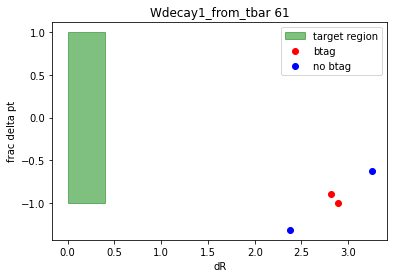

Decay product pt= 25100.091796875
Jet pts= [5.82e+04, 5.03e+04, 4.75e+04, 4.07e+04]
Decay product phi= -1.2987276315689087
Jet phis= [2.66, 1.36, 2.38, 1.46]
Decay product eta= 0.46470212936401367
Jet etas= [-0.0488, -0.685, -0.584, -1.26]


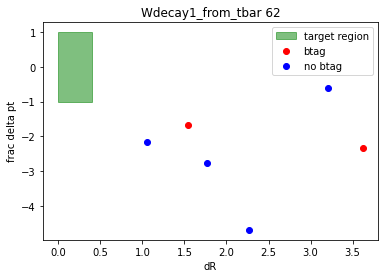

Decay product pt= 22588.96484375
Jet pts= [1.29e+05, 8.5e+04, 7.56e+04, 7.13e+04, 6.05e+04, 3.64e+04]
Decay product phi= -2.161324977874756
Jet phis= [-0.655, 2.72, 2.64, -2.97, -1.32, -0.132]
Decay product eta= -1.549214482307434
Jet etas= [0.138, -0.473, 1.75, -0.872, -0.255, 0.928]


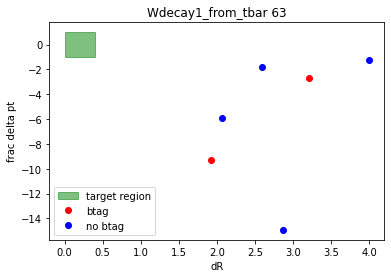

Decay product pt= 14814.7197265625
Jet pts= [2.36e+05, 1.53e+05, 1.02e+05, 5.43e+04, 4.12e+04, 3.3e+04]
Decay product phi= 2.0240638256073
Jet phis= [-1.42, 1.07, 2.53, 1.72, 1.89, -1.1]
Decay product eta= 1.2600488662719727
Jet etas= [0.856, -0.408, -0.738, -1.94, -1.33, -1.23]


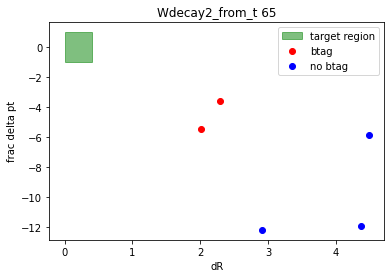

Decay product pt= 7850.6044921875
Jet pts= [1.04e+05, 1.02e+05, 5.39e+04, 5.09e+04, 3.6e+04]
Decay product phi= 2.463047504425049
Jet phis= [-1.5, -0.203, 2.04, 1.04, 1.52]
Decay product eta= 0.0
Jet etas= [-0.833, 0.869, 1.88, -1.17, -0.502]


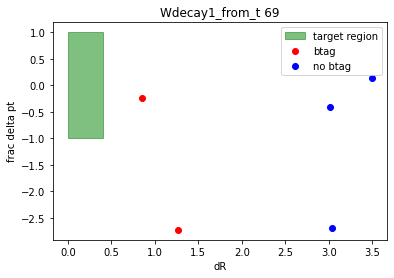

Decay product pt= 29261.63671875
Jet pts= [1.09e+05, 1.08e+05, 4.13e+04, 3.63e+04, 2.55e+04]
Decay product phi= -2.5024123191833496
Jet phis= [2.51, -0.387, 0.506, -1.66, 2.08]
Decay product eta= 2.051079034805298
Jet etas= [2.02, -0.127, 2.25, 2.13, -1]


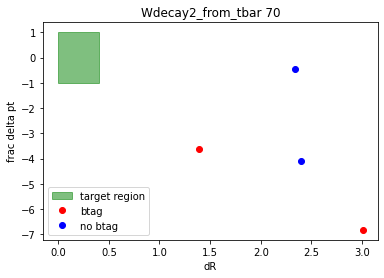

Decay product pt= 19603.064453125
Jet pts= [1.53e+05, 9.98e+04, 9.1e+04, 2.83e+04]
Decay product phi= -2.2830111980438232
Jet phis= [1.02, 0.0475, -3.12, 1.79]
Decay product eta= -0.2957635223865509
Jet etas= [0.0858, 0.259, 0.812, -1.05]


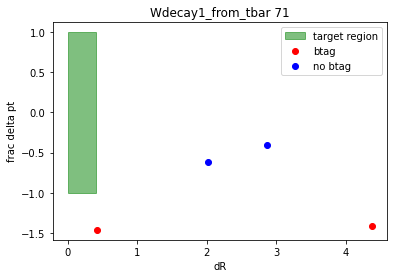

Decay product pt= 40747.76171875
Jet pts= [1e+05, 9.82e+04, 6.59e+04, 5.71e+04]
Decay product phi= -2.3459928035736084
Jet phis= [-2.03, 0.157, -2.54, 0.382]
Decay product eta= 1.830687165260315
Jet etas= [1.56, -1.76, -0.169, 0.961]


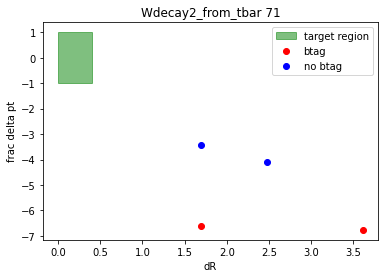

Decay product pt= 12929.470703125
Jet pts= [1e+05, 9.82e+04, 6.59e+04, 5.71e+04]
Decay product phi= 1.2785568237304688
Jet phis= [-2.03, 0.157, -2.54, 0.382]
Decay product eta= -0.4821544885635376
Jet etas= [1.56, -1.76, -0.169, 0.961]


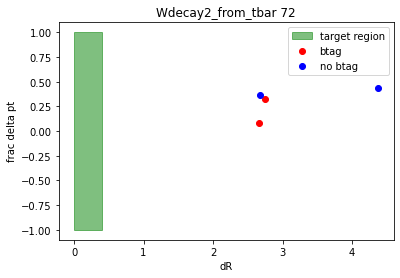

Decay product pt= 52828.10546875
Jet pts= [4.85e+04, 3.56e+04, 3.37e+04, 3e+04]
Decay product phi= -0.9769171476364136
Jet phis= [-0.156, -2.23, 0.611, -3.04]
Decay product eta= -3.6280038356781006
Jet etas= [-1.09, -1.18, -1.47, 0.235]


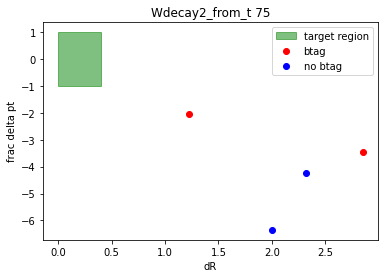

Decay product pt= 16527.365234375
Jet pts= [1.22e+05, 8.65e+04, 7.36e+04, 5.03e+04]
Decay product phi= -1.5619808435440063
Jet phis= [2.92, 0.561, 1.88, -2.1]
Decay product eta= 0.0
Jet etas= [0.517, 2.34, 1.15, 0.305]


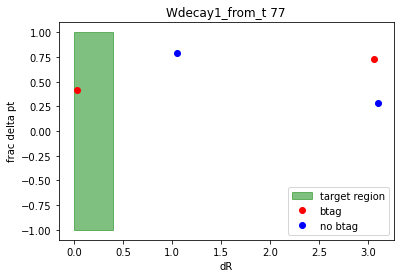

Decay product pt= 137762.46875
Jet pts= [9.81e+04, 8.11e+04, 3.78e+04, 2.96e+04]
Decay product phi= -0.7619619369506836
Jet phis= [2.59, -0.733, 2.5, 0.252]
Decay product eta= 0.9503158926963806
Jet etas= [1.97, 0.945, 1.48, 1.22]


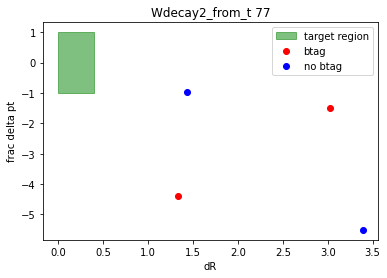

Decay product pt= 15076.93359375
Jet pts= [9.81e+04, 8.11e+04, 3.78e+04, 2.96e+04]
Decay product phi= -0.02408170886337757
Jet phis= [2.59, -0.733, 2.5, 0.252]
Decay product eta= 0.0
Jet etas= [1.97, 0.945, 1.48, 1.22]


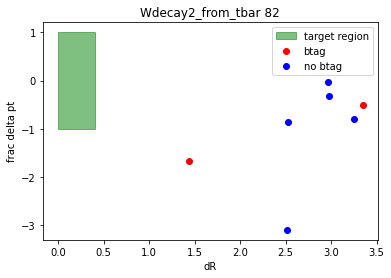

Decay product pt= 28936.1171875
Jet pts= [1.18e+05, 7.72e+04, 5.39e+04, 5.17e+04, 4.34e+04, 3.82e+04, 2.98e+04]
Decay product phi= 0.6723222136497498
Jet phis= [2.7, 0.121, -3.11, 0.594, 2.88, -2.92, -2.01]
Decay product eta= 0.9374276399612427
Jet etas= [-0.544, -0.392, 0.595, -2.32, -1.57, -0.326, -0.311]


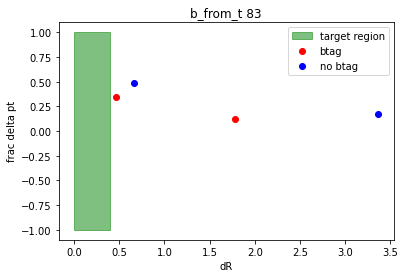

Decay product pt= 55329.78293025566
Jet pts= [4.88e+04, 4.56e+04, 3.6e+04, 2.82e+04]
Decay product phi= -0.198988445471453
Jet phis= [1.57, 2.92, -0.666, 0.388]
Decay product eta= -2.191761515475232
Jet etas= [-2.01, -0.909, -2.16, -1.88]


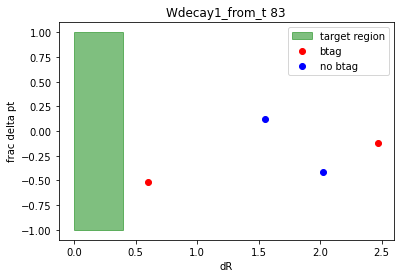

Decay product pt= 32163.201171875
Jet pts= [4.88e+04, 4.56e+04, 3.6e+04, 2.82e+04]
Decay product phi= 1.773667335510254
Jet phis= [1.57, 2.92, -0.666, 0.388]
Decay product eta= -2.577481508255005
Jet etas= [-2.01, -0.909, -2.16, -1.88]


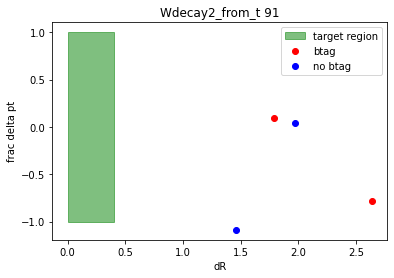

Decay product pt= 32141.759765625
Jet pts= [6.71e+04, 5.73e+04, 3.08e+04, 2.9e+04]
Decay product phi= 2.681673288345337
Jet phis= [2, 0.0664, -2.62, -2.16]
Decay product eta= 0.0
Jet etas= [-0.427, -1.37, -0.0181, -0.656]


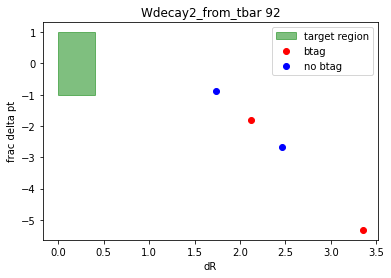

Decay product pt= 16416.49609375
Jet pts= [1.04e+05, 6.02e+04, 4.63e+04, 3.07e+04]
Decay product phi= -0.12318363040685654
Jet phis= [-2.79, -1.62, 1.81, -1.79]
Decay product eta= 1.7279071807861328
Jet etas= [-0.295, -0.23, 0.858, 2.2]


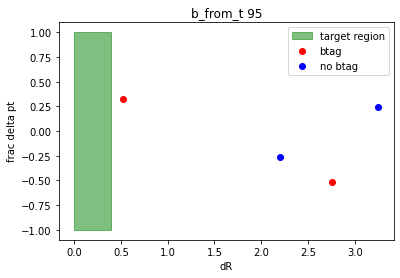

Decay product pt= 48700.72841660442
Jet pts= [7.39e+04, 6.14e+04, 3.66e+04, 3.29e+04]
Decay product phi= 2.8481853761578337
Jet phis= [-2.04, 0.673, -0.381, -3.01]
Decay product eta= -0.3140612523962307
Jet etas= [2.06, -0.0227, -1.43, -0.011]


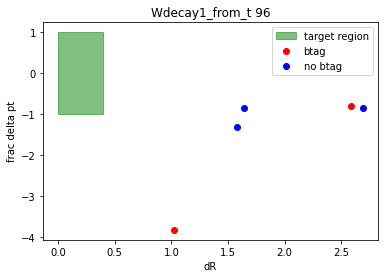

Decay product pt= 16872.43359375
Jet pts= [8.13e+04, 3.9e+04, 3.13e+04, 3.12e+04, 3.02e+04]
Decay product phi= 0.40672075748443604
Jet phis= [1.42, 1.64, 2.04, 2.07, -2.12]
Decay product eta= -0.6025752425193787
Jet etas= [-0.441, 0.389, -0.826, 1.51, -1.12]


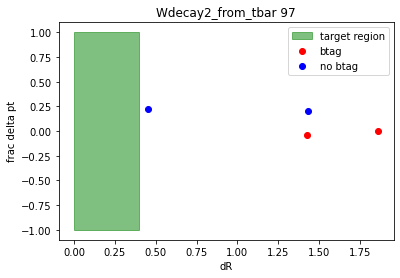

Decay product pt= 49380.88671875
Jet pts= [5.12e+04, 4.95e+04, 3.94e+04, 3.83e+04]
Decay product phi= -2.282991409301758
Jet phis= [-1.07, -0.434, 3.08, -2.7]
Decay product eta= 0.1030501201748848
Jet etas= [-0.648, -0.129, -0.994, -0.0696]


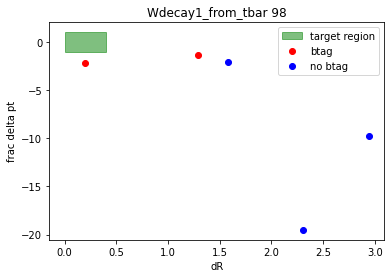

Decay product pt= 33014.9765625
Jet pts= [6.77e+05, 3.55e+05, 1.07e+05, 1.02e+05, 7.89e+04]
Decay product phi= -2.2642669677734375
Jet phis= [1.8, 0.522, -2.23, -0.86, -1.77]
Decay product eta= 0.6622267961502075
Jet etas= [1.27, -0.282, 0.86, 1.39, 1.85]


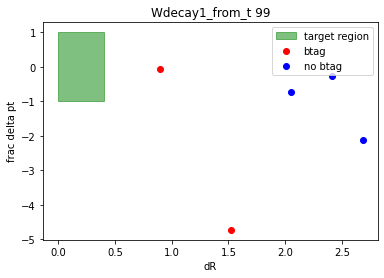

Decay product pt= 24502.16015625
Jet pts= [1.4e+05, 7.62e+04, 4.25e+04, 3.14e+04, 2.62e+04]
Decay product phi= -2.6171767711639404
Jet phis= [-1.33, 1.11, -0.698, -2.46, -1.82]
Decay product eta= -1.0657134056091309
Jet etas= [-0.254, -0.27, -0.346, 1.34, -0.645]


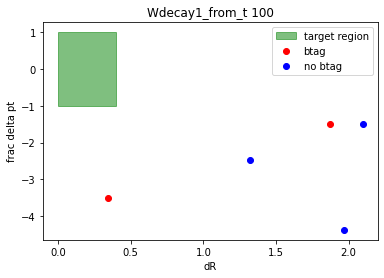

Decay product pt= 12024.1884765625
Jet pts= [6.46e+04, 5.4e+04, 4.18e+04, 3.01e+04, 3e+04]
Decay product phi= -0.2169128656387329
Jet phis= [0.323, -0.233, 1.08, 1.64, 0.908]
Decay product eta= -0.3956856429576874
Jet etas= [-2.29, -0.0505, -0.64, -0.209, -2.17]


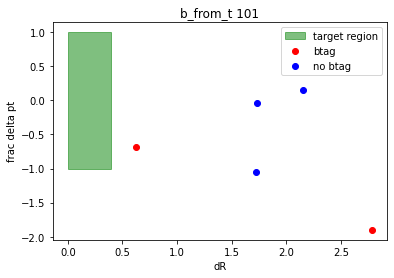

Decay product pt= 33656.14165516174
Jet pts= [9.76e+04, 6.89e+04, 5.66e+04, 3.49e+04, 2.83e+04]
Decay product phi= 3.0303549348041674
Jet phis= [-0.998, -2.44, 2.48, 2.74, -1.12]
Decay product eta= -0.7067488740018542
Jet etas= [0.931, 0.814, -0.43, 1, -0.43]


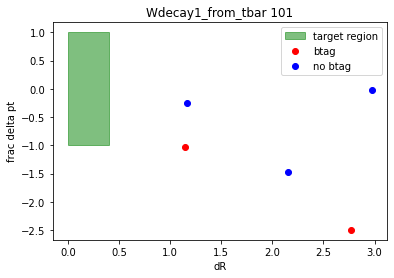

Decay product pt= 27918.962890625
Jet pts= [9.76e+04, 6.89e+04, 5.66e+04, 3.49e+04, 2.83e+04]
Decay product phi= 1.7275009155273438
Jet phis= [-0.998, -2.44, 2.48, 2.74, -1.12]
Decay product eta= 0.437501460313797
Jet etas= [0.931, 0.814, -0.43, 1, -0.43]


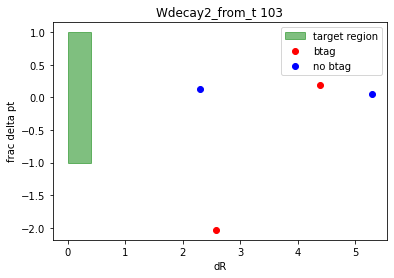

Decay product pt= 32031.642578125
Jet pts= [9.72e+04, 3.04e+04, 2.77e+04, 2.58e+04]
Decay product phi= -2.650541305541992
Jet phis= [1.68, 0.382, 2.69, 0.316]
Decay product eta= 0.0
Jet etas= [-0.281, 2.37, 0.133, 1.26]


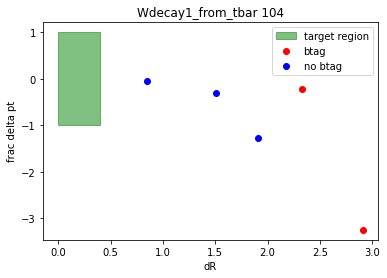

Decay product pt= 28983.328125
Jet pts= [1.23e+05, 6.58e+04, 3.8e+04, 3.52e+04, 3.01e+04]
Decay product phi= 0.4888390004634857
Jet phis= [-2.41, -1.42, 1.67, -1.8, -0.357]
Decay product eta= 1.4674335718154907
Jet etas= [1.2, 1.35, 2.4, 1.06, 1.41]


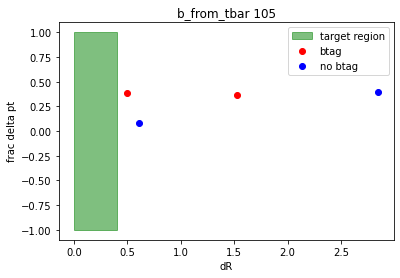

Decay product pt= 78282.94392719389
Jet pts= [7.19e+04, 4.95e+04, 4.79e+04, 4.75e+04]
Decay product phi= 1.908945216109693
Jet phis= [2.43, 1.76, 1.45, -0.812]
Decay product eta= -0.6310584465331628
Jet etas= [-0.316, 0.889, -0.809, 0.218]


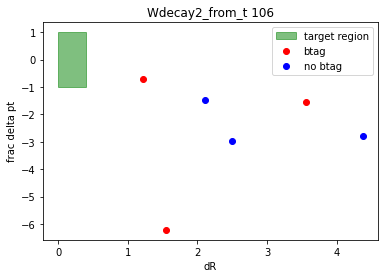

Decay product pt= 19076.70703125
Jet pts= [1.38e+05, 7.57e+04, 7.24e+04, 4.84e+04, 4.7e+04, 3.26e+04]
Decay product phi= -3.0534708499908447
Jet phis= [-2.33, -0.871, -0.358, 1.71, 1.16, -2.15]
Decay product eta= 0.0
Jet etas= [0.155, -0.00922, 2.23, 2.01, -0.789, -0.388]


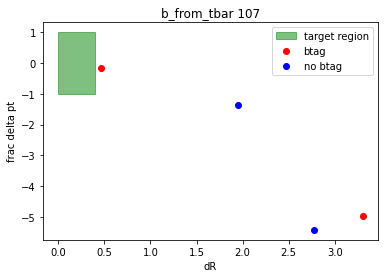

Decay product pt= 24387.695283623638
Jet pts= [1.57e+05, 1.46e+05, 5.76e+04, 2.83e+04]
Decay product phi= -0.40265855663622485
Jet phis= [-2.99, 2.92, -2.25, -0.678]
Decay product eta= 1.1897270427191529
Jet etas= [0.185, -0.275, 0.575, 0.81]


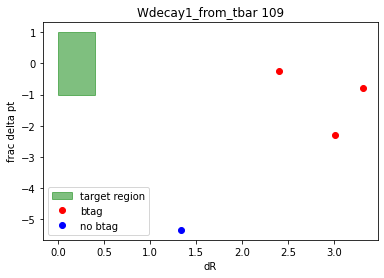

Decay product pt= 21401.71875
Jet pts= [1.36e+05, 7.03e+04, 3.86e+04, 2.66e+04]
Decay product phi= 1.339228868484497
Jet phis= [2.6, -1.61, -1.71, 0.858]
Decay product eta= 2.059718370437622
Jet etas= [1.63, 1.48, 0.785, -0.284]


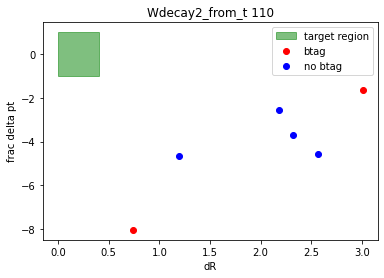

Decay product pt= 16493.279296875
Jet pts= [1.49e+05, 9.33e+04, 9.18e+04, 7.72e+04, 5.83e+04, 4.35e+04]
Decay product phi= -0.46292078495025635
Jet phis= [-0.751, 0.696, -2.99, -2.54, -1.46, 2.9]
Decay product eta= 0.0
Jet etas= [1.52, 1.94, 1.75, 1.17, 0.262, 1.5]


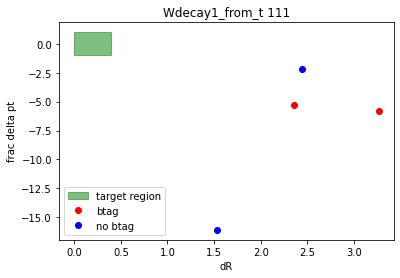

Decay product pt= 14915.7919921875
Jet pts= [2.55e+05, 1.02e+05, 9.4e+04, 4.76e+04]
Decay product phi= -2.498626947402954
Jet phis= [2.94, -0.527, -0.306, -1.19]
Decay product eta= 1.6525354385375977
Jet etas= [0.378, -0.946, 0.803, -0.414]


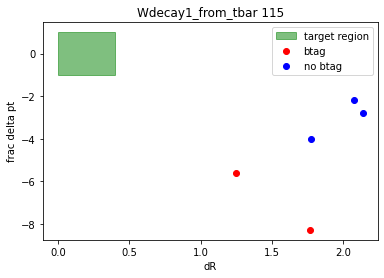

Decay product pt= 16475.033203125
Jet pts= [1.53e+05, 1.09e+05, 8.29e+04, 6.26e+04, 5.22e+04]
Decay product phi= 0.4633895456790924
Jet phis= [2.12, -0.758, -1.29, 1.88, 1.67]
Decay product eta= -0.16664212942123413
Jet etas= [-0.796, -0.414, -0.484, -1.77, 1.53]


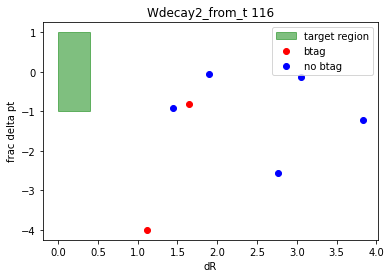

Decay product pt= 29199.990234375
Jet pts= [1.46e+05, 1.04e+05, 6.46e+04, 5.59e+04, 5.27e+04, 3.32e+04, 3.07e+04]
Decay product phi= 2.9946603775024414
Jet phis= [-2.2, 0.569, 0.0712, -1.91, 1.66, 0.699, -1.46]
Decay product eta= 0.0
Jet etas= [0.21, 1.31, 2.46, -0.467, -0.97, 2.01, -0.496]


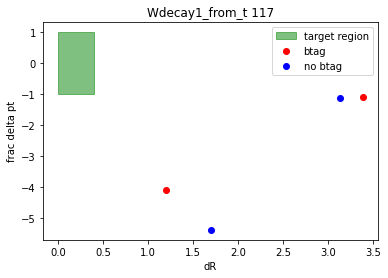

Decay product pt= 16681.78515625
Jet pts= [1.06e+05, 8.49e+04, 3.54e+04, 3.45e+04]
Decay product phi= 1.9382394552230835
Jet phis= [2.28, 3.06, -0.95, -1.41]
Decay product eta= 1.5948036909103394
Jet etas= [-0.0685, 2, 0.396, -0.0912]


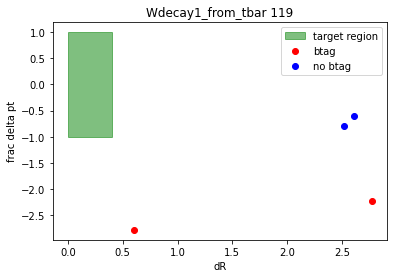

Decay product pt= 33086.7734375
Jet pts= [1.25e+05, 1.07e+05, 5.92e+04, 5.32e+04]
Decay product phi= 2.275514602661133
Jet phis= [2.61, -0.493, -1.49, -1.61]
Decay product eta= -0.11959536373615265
Jet etas= [-0.623, -0.304, 0.0215, 0.922]


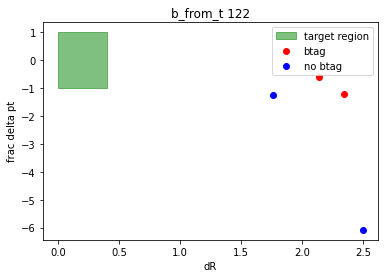

Decay product pt= 15699.46287172439
Jet pts= [1.11e+05, 3.54e+04, 3.47e+04, 2.51e+04]
Decay product phi= 0.5312796529367505
Jet phis= [2.11, -0.762, 1.79, 2.42]
Decay product eta= -0.14670744354643678
Jet etas= [1.79, -1.34, -2.12, -1.15]


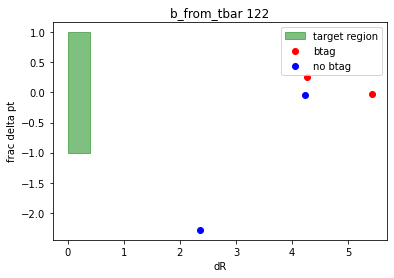

Decay product pt= 33870.58253339559
Jet pts= [1.11e+05, 3.54e+04, 3.47e+04, 2.51e+04]
Decay product phi= -2.003992346837742
Jet phis= [2.11, -0.762, 1.79, 2.42]
Decay product eta= 2.7006386954318327
Jet etas= [1.79, -1.34, -2.12, -1.15]


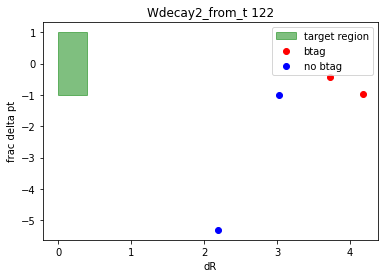

Decay product pt= 17632.76171875
Jet pts= [1.11e+05, 3.54e+04, 3.47e+04, 2.51e+04]
Decay product phi= -0.07568532973527908
Jet phis= [2.11, -0.762, 1.79, 2.42]
Decay product eta= 0.0
Jet etas= [1.79, -1.34, -2.12, -1.15]


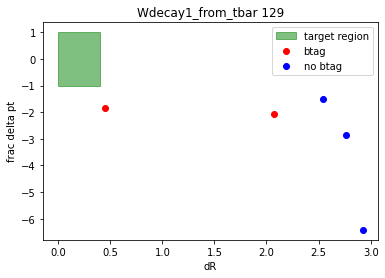

Decay product pt= 18353.583984375
Jet pts= [1.36e+05, 7.05e+04, 5.6e+04, 5.21e+04, 4.58e+04]
Decay product phi= -0.917773962020874
Jet phis= [-2.62, 1.64, -2.93, -1.23, -1.8]
Decay product eta= 0.6475818157196045
Jet etas= [-1.73, 1.68, 1.14, 0.97, -1.73]


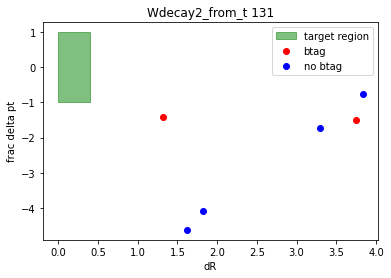

Decay product pt= 16155.7646484375
Jet pts= [9.09e+04, 8.21e+04, 4.41e+04, 4.01e+04, 3.88e+04, 2.82e+04]
Decay product phi= 0.15527404844760895
Jet phis= [0.311, -0.499, 2.86, -2.64, -0.888, 3.11]
Decay product eta= 0.0
Jet etas= [-0.00647, 0.0817, 0.258, 0.872, -0.824, 0.808]


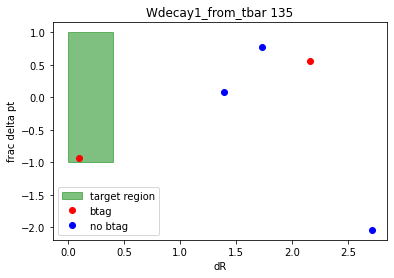

Decay product pt= 147891.046875
Jet pts= [4.49e+05, 2.87e+05, 1.37e+05, 6.51e+04, 3.38e+04]
Decay product phi= 0.15175050497055054
Jet phis= [-2.4, 0.113, 1.46, 2.1, 1.82]
Decay product eta= 0.6033284664154053
Jet etas= [1.52, 0.51, 0.139, 1.53, 1.07]


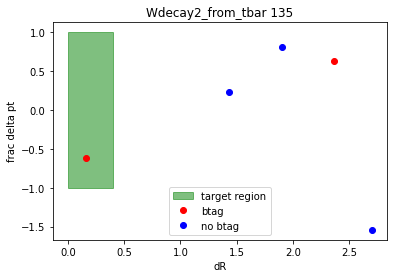

Decay product pt= 176730.125
Jet pts= [4.49e+05, 2.87e+05, 1.37e+05, 6.51e+04, 3.38e+04]
Decay product phi= 0.045396216213703156
Jet phis= [-2.4, 0.113, 1.46, 2.1, 1.82]
Decay product eta= 0.3674177825450897
Jet etas= [1.52, 0.51, 0.139, 1.53, 1.07]


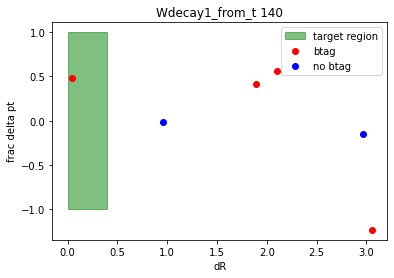

Decay product pt= 80540.578125
Jet pts= [1.8e+05, 9.3e+04, 8.21e+04, 4.75e+04, 4.16e+04, 3.55e+04]
Decay product phi= -0.878849983215332
Jet phis= [1.85, -1.66, -0.9, -0.117, -0.843, -1.94]
Decay product eta= 0.45709139108657837
Jet etas= [1.83, -2.41, -0.502, 2.19, 0.479, -1.37]


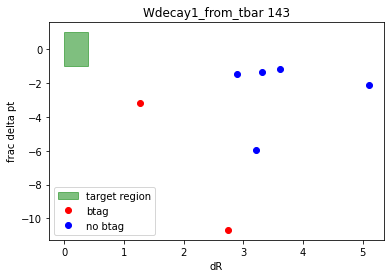

Decay product pt= 11465.591796875
Jet pts= [1.34e+05, 7.99e+04, 4.81e+04, 3.57e+04, 2.83e+04, 2.66e+04, 2.51e+04]
Decay product phi= 0.14545953273773193
Jet phis= [-2.38, 1.86, -0.278, -2.75, 0.705, 0.915, -1.96]
Decay product eta= -2.4520328044891357
Jet etas= [-1.38, 0.257, -1.26, 1.75, 0.383, 0.765, 0.483]


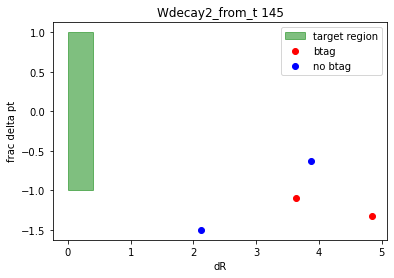

Decay product pt= 17975.2578125
Jet pts= [4.5e+04, 4.19e+04, 3.78e+04, 2.94e+04]
Decay product phi= 1.9512910842895508
Jet phis= [1.63, 2.56, -1.03, 2.56]
Decay product eta= 0.0
Jet etas= [-1.46, 1.24, -1.48, 0.263]


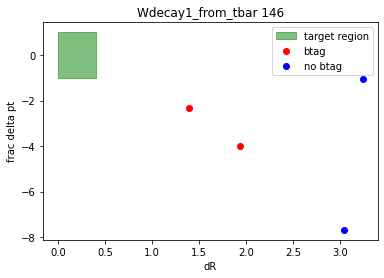

Decay product pt= 13802.4326171875
Jet pts= [1.2e+05, 6.89e+04, 4.6e+04, 2.87e+04]
Decay product phi= -0.4304957687854767
Jet phis= [2.6, -2.28, 0.695, 1.1]
Decay product eta= 0.8971768021583557
Jet etas= [0.694, 0.331, 0.0855, -1.96]


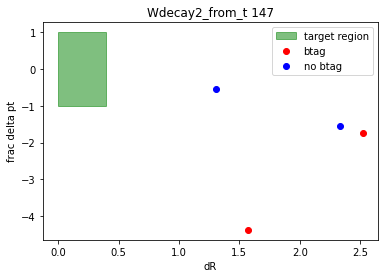

Decay product pt= 24385.88671875
Jet pts= [1.31e+05, 6.67e+04, 6.24e+04, 3.75e+04]
Decay product phi= 2.5744404792785645
Jet phis= [-2.6, 0.0551, 0.76, 1.63]
Decay product eta= 0.0
Jet etas= [-0.0697, 1, -0.424, 1.94]


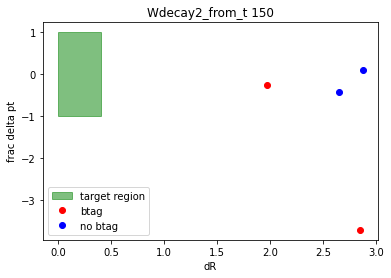

Decay product pt= 28315.3359375
Jet pts= [1.33e+05, 4.03e+04, 3.55e+04, 2.55e+04]
Decay product phi= 0.9571082592010498
Jet phis= [-1.89, -2.85, -0.913, -0.743]
Decay product eta= 0.0
Jet etas= [-1.49, -2.46, -2.15, 0.795]


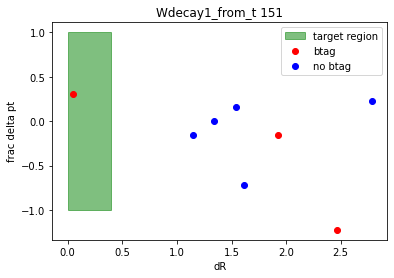

Decay product pt= 36932.9453125
Jet pts= [8.21e+04, 6.35e+04, 4.26e+04, 4.26e+04, 3.68e+04, 3.11e+04, 2.86e+04, 2.55e+04]
Decay product phi= 1.0157852172851562
Jet phis= [-1.45, 1.44, 1.78, 0.983, 1.22, 1.86, -0.206, 0.98]
Decay product eta= -0.48705193400382996
Jet etas= [-0.501, 1.07, 0.359, 1.44, -1.81, 0.808, 2.02, -0.46]


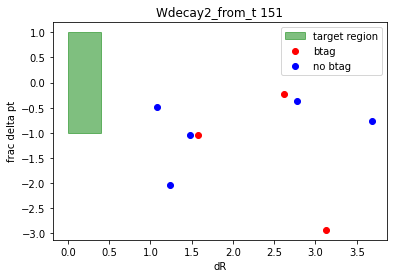

Decay product pt= 20902.349609375
Jet pts= [8.21e+04, 6.35e+04, 4.26e+04, 4.26e+04, 3.68e+04, 3.11e+04, 2.86e+04, 2.55e+04]
Decay product phi= 2.5480308532714844
Jet phis= [-1.45, 1.44, 1.78, 0.983, 1.22, 1.86, -0.206, 0.98]
Decay product eta= 0.0
Jet etas= [-0.501, 1.07, 0.359, 1.44, -1.81, 0.808, 2.02, -0.46]


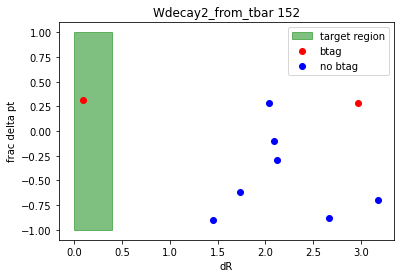

Decay product pt= 41207.88671875
Jet pts= [7.81e+04, 7.75e+04, 6.98e+04, 6.68e+04, ... 4.53e+04, 2.97e+04, 2.96e+04, 2.83e+04]
Decay product phi= 2.9411847591400146
Jet phis= [-2.16, 0.447, -0.936, 1.3, 0.957, -1.36, -1.92, -0.525, 2.93]
Decay product eta= 1.518831729888916
Jet etas= [2.35, 0.59, -0.561, 2.07, 0.774, 2.18, 0.0525, 2.46, 1.61]


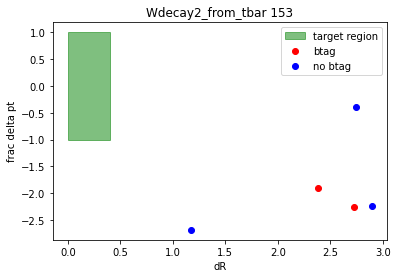

Decay product pt= 25185.447265625
Jet pts= [9.27e+04, 8.2e+04, 8.15e+04, 7.29e+04, 3.52e+04]
Decay product phi= 1.26893150806427
Jet phis= [2.41, -2.68, -2.12, -0.766, 0.98]
Decay product eta= -1.1359074115753174
Jet etas= [-0.871, 0.285, -0.92, 0.0976, 1.6]


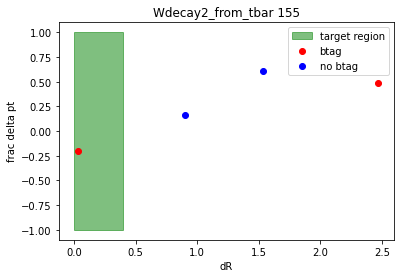

Decay product pt= 80050.34375
Jet pts= [9.61e+04, 6.68e+04, 4.09e+04, 3.18e+04]
Decay product phi= -1.116736888885498
Jet phis= [-1.1, -1.38, 2.77, -0.254]
Decay product eta= 0.926926851272583
Jet etas= [0.896, 0.0647, 1.53, -0.343]


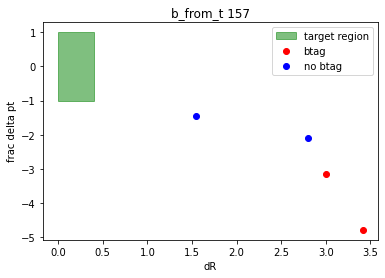

Decay product pt= 11298.295723503647
Jet pts= [6.53e+04, 4.69e+04, 3.5e+04, 2.78e+04]
Decay product phi= 0.7963129956522939
Jet phis= [-2.22, -2.57, -0.933, -0.409]
Decay product eta= 2.428240313939437
Jet etas= [0.833, 1.73, 0.226, 1.46]


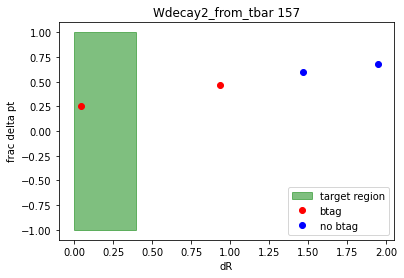

Decay product pt= 87943.28125
Jet pts= [6.53e+04, 4.69e+04, 3.5e+04, 2.78e+04]
Decay product phi= -2.260831356048584
Jet phis= [-2.22, -2.57, -0.933, -0.409]
Decay product eta= 0.8447479605674744
Jet etas= [0.833, 1.73, 0.226, 1.46]


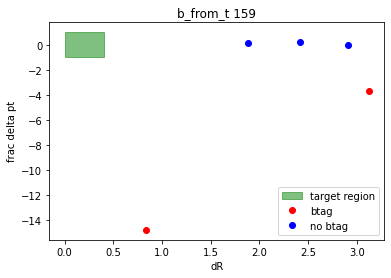

Decay product pt= 36341.79793796348
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= 1.3779790233268656
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= -0.5089702233526928
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


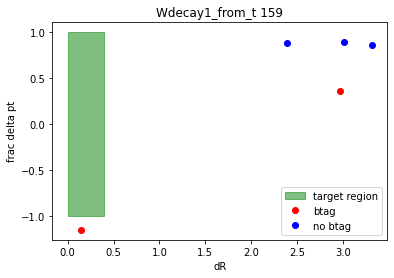

Decay product pt= 267171.5
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= 1.6438332796096802
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= 0.4133840501308441
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


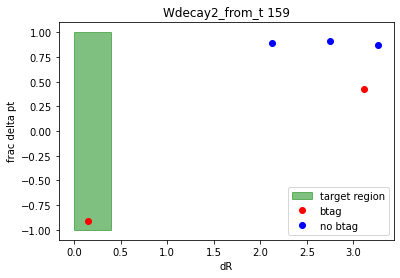

Decay product pt= 300091.6875
Jet pts= [5.74e+05, 1.71e+05, 3.72e+04, 3.24e+04, 2.7e+04]
Decay product phi= 1.4663279056549072
Jet phis= [1.56, -1.71, -2.46, -0.501, -0.97]
Decay product eta= 0.0
Jet etas= [0.303, -0.0466, -2.08, -0.64, -1.09]


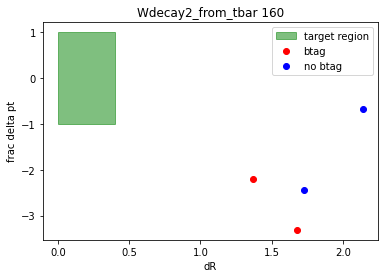

Decay product pt= 24431.259765625
Jet pts= [1.05e+05, 8.43e+04, 7.83e+04, 4.09e+04]
Decay product phi= 1.6331968307495117
Jet phis= [2.92, 0.02, 0.489, -2.89]
Decay product eta= -0.9612841010093689
Jet etas= [0.125, -0.338, -1.71, 0.261]


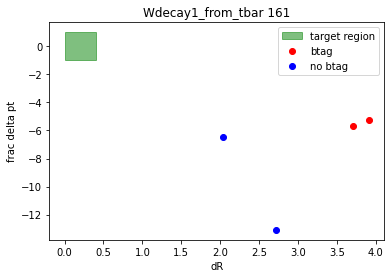

Decay product pt= 7189.6259765625
Jet pts= [1.01e+05, 5.37e+04, 4.8e+04, 4.49e+04]
Decay product phi= 2.0442299842834473
Jet phis= [0.326, 2.58, -1.14, 0.236]
Decay product eta= -2.1661953926086426
Jet etas= [-0.0527, -0.195, -0.129, 1.3]


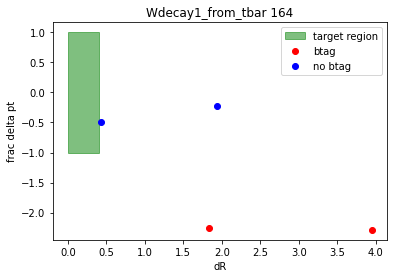

Decay product pt= 22386.408203125
Jet pts= [7.36e+04, 7.29e+04, 3.35e+04, 2.73e+04]
Decay product phi= 0.8267463445663452
Jet phis= [2.11, -0.771, 1.03, 0.82]
Decay product eta= 2.4660661220550537
Jet etas= [-1.27, 1.56, 2.1, 0.526]


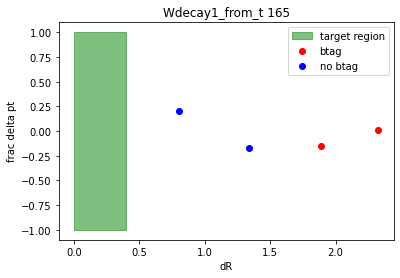

Decay product pt= 46127.86328125
Jet pts= [5.38e+04, 5.32e+04, 4.57e+04, 3.69e+04]
Decay product phi= 0.812722384929657
Jet phis= [1.44, 2.02, -1.41, 0.233]
Decay product eta= 2.5991549491882324
Jet etas= [1.42, 1.14, 1.9, 2.04]


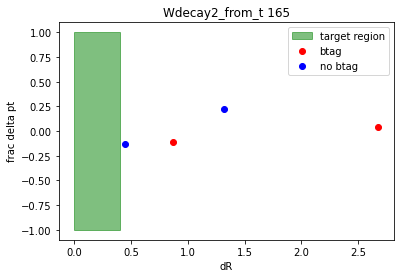

Decay product pt= 47828.53515625
Jet pts= [5.38e+04, 5.32e+04, 4.57e+04, 3.69e+04]
Decay product phi= 1.1443984508514404
Jet phis= [1.44, 2.02, -1.41, 0.233]
Decay product eta= 0.0
Jet etas= [1.42, 1.14, 1.9, 2.04]


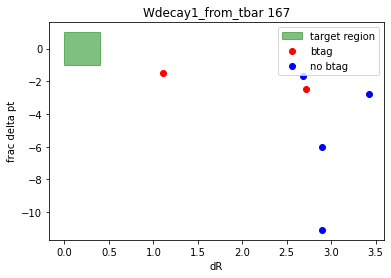

Decay product pt= 12031.2294921875
Jet pts= [1.45e+05, 8.4e+04, 4.51e+04, 4.14e+04, 3.21e+04, 3e+04]
Decay product phi= -0.8497335910797119
Jet phis= [-2.09, 1.28, 1.58, 1.5, -0.994, 0.258]
Decay product eta= 1.037964105606079
Jet etas= [-1.58, -0.917, -1.38, -0.323, -1.64, 1.04]


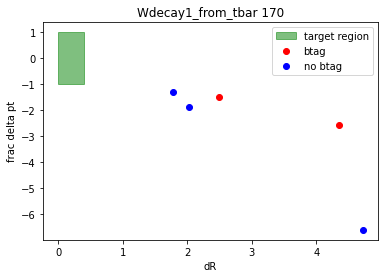

Decay product pt= 26212.537109375
Jet pts= [2e+05, 9.32e+04, 7.59e+04, 6.58e+04, 6.03e+04]
Decay product phi= -1.2412102222442627
Jet phis= [-1.78, 1.39, -3.14, -1.17, -0.815]
Decay product eta= 2.538292169570923
Jet etas= [-2.15, -0.921, 1.82, 0.0496, 0.819]


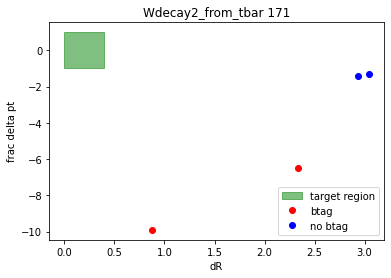

Decay product pt= 22264.326171875
Jet pts= [2.43e+05, 1.66e+05, 5.41e+04, 5.16e+04]
Decay product phi= -2.9041874408721924
Jet phis= [-2.39, 1.05, 0.456, 0.845]
Decay product eta= -0.05359360948204994
Jet etas= [0.656, -0.258, -0.293, 1.63]


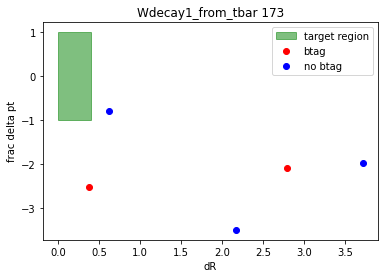

Decay product pt= 20095.876953125
Jet pts= [9.05e+04, 7.09e+04, 6.19e+04, 5.98e+04, 3.59e+04]
Decay product phi= -2.80328106880188
Jet phis= [1.32, -2.71, -0.602, -0.354, 2.96]
Decay product eta= 1.7611452341079712
Jet etas= [1.71, 2.13, 0.0524, -1.03, 1.42]


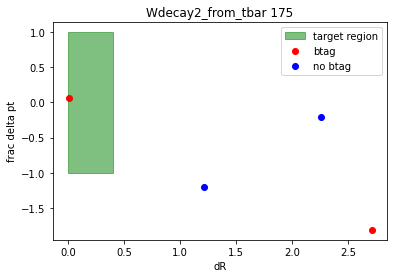

Decay product pt= 44098.49609375
Jet pts= [1.24e+05, 9.7e+04, 5.3e+04, 4.13e+04]
Decay product phi= 0.35874852538108826
Jet phis= [3.07, -0.409, -0.844, 0.355]
Decay product eta= 0.023748476058244705
Jet etas= [-0.127, 0.966, 1.94, 0.0372]


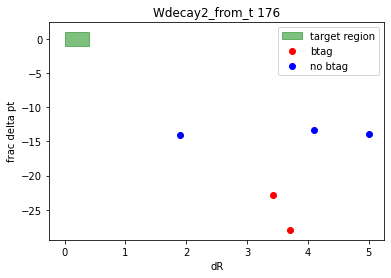

Decay product pt= 2041.432861328125
Jet pts= [5.91e+04, 4.88e+04, 3.09e+04, 3.05e+04, 2.91e+04]
Decay product phi= 0.44747450947761536
Jet phis= [1.6, 0.0381, -1.45, 2.99, -2.09]
Decay product eta= 0.0
Jet etas= [-1.27, -1.15, 2.08, -2.06, -0.963]


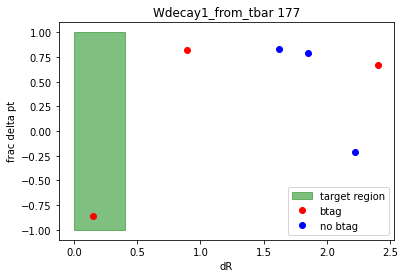

Decay product pt= 262086.828125
Jet pts= [4.88e+05, 3.19e+05, 8.58e+04, 5.56e+04, 4.73e+04, 4.35e+04]
Decay product phi= -2.2786448001861572
Jet phis= [-2.31, 1.78, 0.0405, -0.948, -3.13, -0.672]
Decay product eta= -0.0457584448158741
Jet etas= [-0.189, -0.14, -0.693, -1.33, 0.227, 0.195]


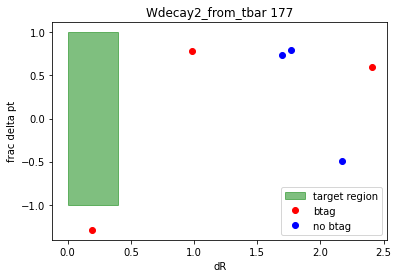

Decay product pt= 212985.21875
Jet pts= [4.88e+05, 3.19e+05, 8.58e+04, 5.56e+04, 4.73e+04, 4.35e+04]
Decay product phi= -2.3464462757110596
Jet phis= [-2.31, 1.78, 0.0405, -0.948, -3.13, -0.672]
Decay product eta= -0.3745599389076233
Jet etas= [-0.189, -0.14, -0.693, -1.33, 0.227, 0.195]


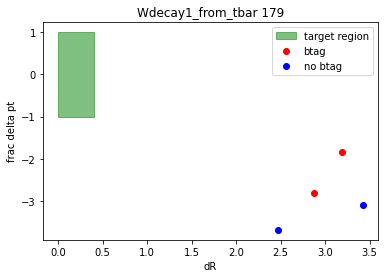

Decay product pt= 13049.4521484375
Jet pts= [6.12e+04, 5.34e+04, 4.96e+04, 3.7e+04]
Decay product phi= -2.293280601501465
Jet phis= [3.12, 1.89, 0.144, 0.807]
Decay product eta= 0.2367127537727356
Jet etas= [-2.07, -2.46, -1.28, -0.514]


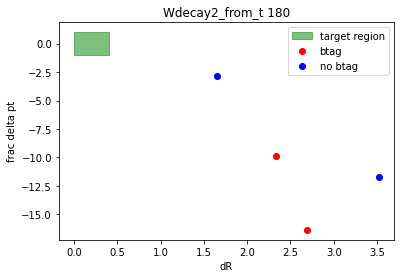

Decay product pt= 7383.04443359375
Jet pts= [1.28e+05, 9.4e+04, 8.02e+04, 2.86e+04]
Decay product phi= 1.2643588781356812
Jet phis= [3.05, -2.09, -0.671, 0.849]
Decay product eta= 0.0
Jet etas= [-0.662, -0.596, 0.0542, -0.252]


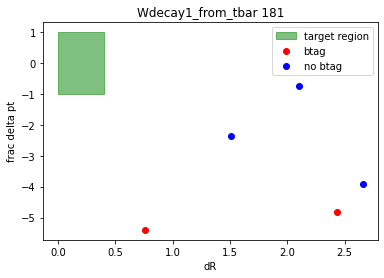

Decay product pt= 19619.5859375
Jet pts= [1.26e+05, 1.14e+05, 9.67e+04, 6.62e+04, 3.44e+04]
Decay product phi= 1.6066452264785767
Jet phis= [1.89, -0.781, -2.03, 0.102, -0.484]
Decay product eta= 0.5239295363426208
Jet etas= [-0.179, 0.0645, 0.268, 0.517, 0.723]


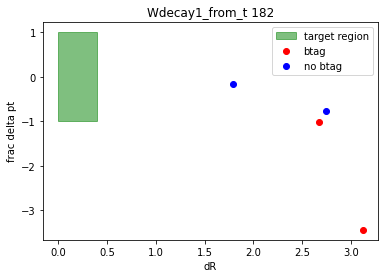

Decay product pt= 24516.123046875
Jet pts= [1.09e+05, 4.95e+04, 4.37e+04, 2.83e+04]
Decay product phi= 0.2183830440044403
Jet phis= [2.42, -1.37, -2.22, 0.0263]
Decay product eta= -0.5833913087844849
Jet etas= [1.62, 1.57, 0.677, -2.36]


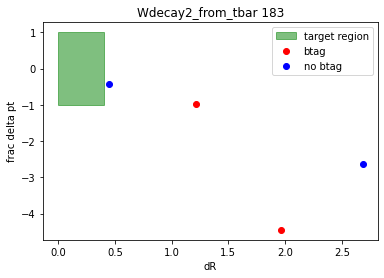

Decay product pt= 18744.583984375
Jet pts= [1.02e+05, 6.8e+04, 3.71e+04, 2.67e+04]
Decay product phi= 1.1328603029251099
Jet phis= [1.49, -0.583, -0.0689, 1.32]
Decay product eta= -0.790928840637207
Jet etas= [1.14, 1.27, -0.64, -0.384]


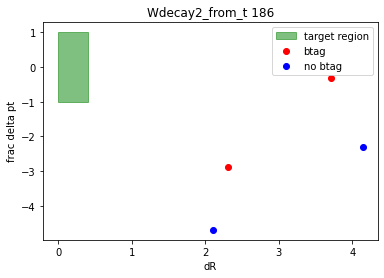

Decay product pt= 24975.484375
Jet pts= [1.42e+05, 9.72e+04, 8.27e+04, 3.26e+04]
Decay product phi= -0.05133707821369171
Jet phis= [-2.06, 1.66, -2.51, 3.11]
Decay product eta= 0.0
Jet etas= [-0.272, 0.657, 2.44, 1.09]


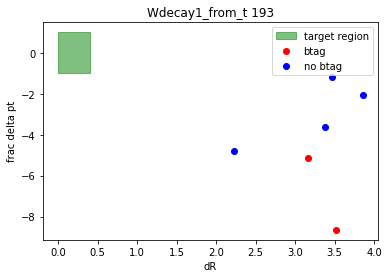

Decay product pt= 13487.45703125
Jet pts= [1.3e+05, 8.25e+04, 7.82e+04, 6.24e+04, 4.12e+04, 2.94e+04]
Decay product phi= -2.188549757003784
Jet phis= [1.23, -0.00574, -1.24, -1.83, -2.44, 0.717]
Decay product eta= -3.8142330646514893
Jet etas= [-1.77, -1.52, -1.8, -0.452, 0.0306, -1.93]


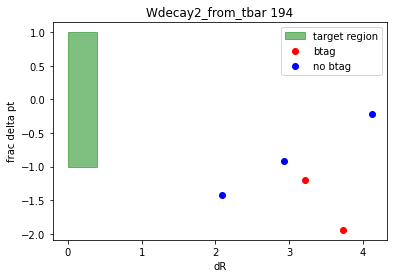

Decay product pt= 21313.998046875
Jet pts= [6.27e+04, 5.17e+04, 4.7e+04, 4.08e+04, 2.61e+04]
Decay product phi= 1.0199185609817505
Jet phis= [-2.33, 2.32, -1.63, 1.79, -0.169]
Decay product eta= -3.0704312324523926
Jet etas= [-0.753, -1.43, -1.26, -0.24, 0.877]


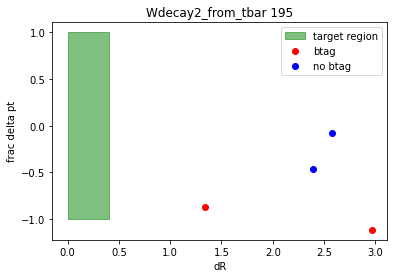

Decay product pt= 25736.49609375
Jet pts= [5.44e+04, 4.81e+04, 3.78e+04, 2.78e+04]
Decay product phi= 2.6692731380462646
Jet phis= [0.0295, 2.68, -1.36, 2.5]
Decay product eta= -2.4910874366760254
Jet etas= [-1.13, -1.16, -1.68, 0.086]


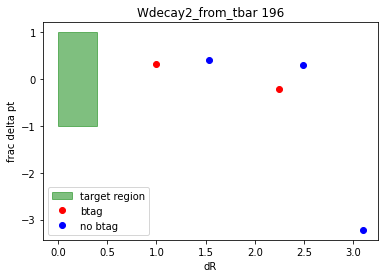

Decay product pt= 52105.02734375
Jet pts= [2.2e+05, 6.32e+04, 3.61e+04, 3.53e+04, 3.12e+04]
Decay product phi= -2.7387688159942627
Jet phis= [0.359, 2.11, -0.396, 2.75, -3.11]
Decay product eta= -0.6261124014854431
Jet etas= [-0.597, 1.1, 0.213, -1.23, 0.864]


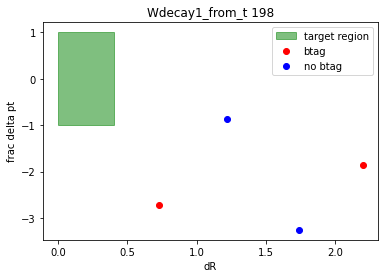

Decay product pt= 25478.3046875
Jet pts= [1.08e+05, 9.49e+04, 7.28e+04, 4.78e+04]
Decay product phi= 0.9934033155441284
Jet phis= [2.62, 1, 3.14, -0.109]
Decay product eta= 0.8578838109970093
Jet etas= [0.253, 1.59, 1.34, 0.342]


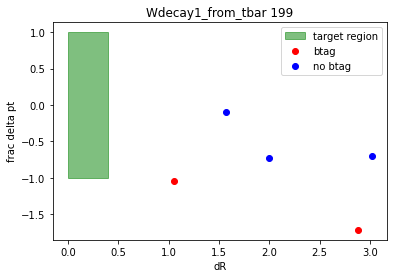

Decay product pt= 27371.37109375
Jet pts= [7.43e+04, 5.6e+04, 4.72e+04, 4.64e+04, 3.02e+04]
Decay product phi= -2.3671863079071045
Jet phis= [-0.17, -3.09, -1.71, 1.07, 2.95]
Decay product eta= -0.36496806144714355
Jet etas= [-2.23, 0.401, -2.25, 0.638, 0.871]


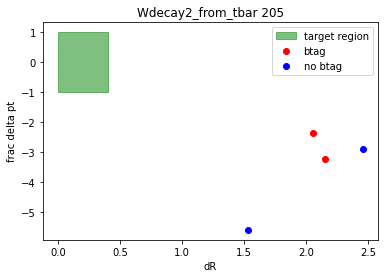

Decay product pt= 21451.732421875
Jet pts= [1.41e+05, 9.1e+04, 8.36e+04, 7.22e+04]
Decay product phi= 1.68909752368927
Jet phis= [0.991, -2.68, -2.25, -0.227]
Decay product eta= -0.7821416258811951
Jet etas= [-2.15, 0.192, -0.0361, -0.0416]


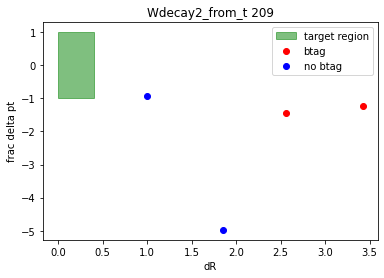

Decay product pt= 15318.015625
Jet pts= [9.15e+04, 3.75e+04, 3.41e+04, 2.96e+04]
Decay product phi= 0.648851215839386
Jet phis= [0.766, -3.14, -2.56, -0.282]
Decay product eta= 0.0
Jet etas= [0.366, 1.64, 0.714, 1.87]


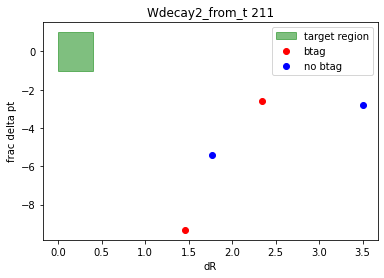

Decay product pt= 15514.3037109375
Jet pts= [1.6e+05, 9.91e+04, 5.94e+04, 5.54e+04]
Decay product phi= -0.9485297799110413
Jet phis= [-1.14, -0.223, 2.71, -2.93]
Decay product eta= 0.0
Jet etas= [0.194, 0.359, 1.07, 0.0121]


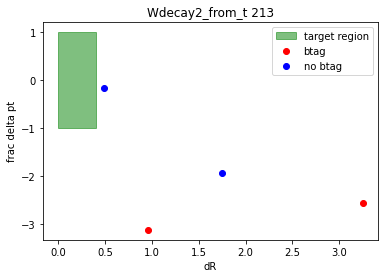

Decay product pt= 25508.67578125
Jet pts= [1.05e+05, 9.04e+04, 7.45e+04, 2.94e+04]
Decay product phi= 0.16522802412509918
Jet phis= [0.968, -3.04, 0.441, -0.0505]
Decay product eta= 0.0
Jet etas= [0.907, 0.378, -0.304, 0.988]


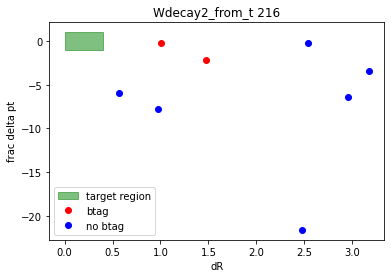

Decay product pt= 25632.119140625
Jet pts= [5.8e+05, 2.25e+05, 1.91e+05, 1.79e+05, 1.13e+05, 8.05e+04, 3.3e+04, 3.24e+04]
Decay product phi= -2.7953085899353027
Jet phis= [1.04, 3.07, -1.33, -2.25, 0.396, -1.34, -1.86, -0.572]
Decay product eta= 0.0
Jet etas= [0.126, -1.12, 2.33, -0.404, 0.476, -0.506, -0.598, -1.46]


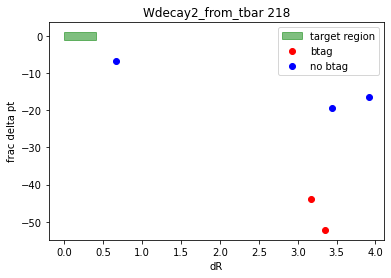

Decay product pt= 3294.822998046875
Jet pts= [1.75e+05, 1.48e+05, 6.76e+04, 5.73e+04, 2.51e+04]
Decay product phi= 1.02686607837677
Jet phis= [1.95, -1.28, 1.08, -1.43, 0.39]
Decay product eta= 2.099682569503784
Jet etas= [-1.12, -0.0748, -1.34, -0.945, 1.93]


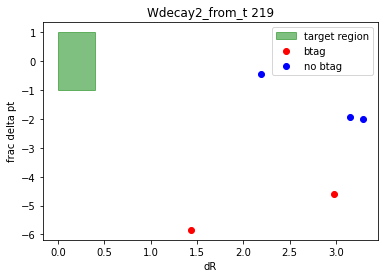

Decay product pt= 19672.23828125
Jet pts= [1.35e+05, 1.1e+05, 5.91e+04, 5.8e+04, 2.83e+04]
Decay product phi= -1.5147700309753418
Jet phis= [-0.816, 2.19, 0.232, 1.67, 2.6]
Decay product eta= 0.0
Jet etas= [0.515, 0.757, 2.05, -0.177, -1.05]


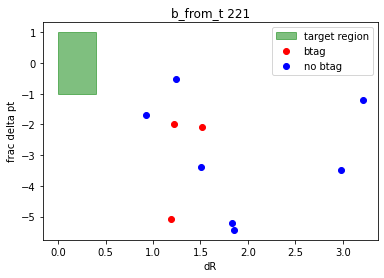

Decay product pt= 17610.155277605507
Jet pts= [1.13e+05, 1.09e+05, 1.07e+05, 7.88e+04, ... 5.25e+04, 4.75e+04, 3.89e+04, 2.7e+04]
Decay product phi= -3.000568813329086
Jet phis= [2.24, -1.42, 2.3, 0.35, 2.05, -2.49, -1.96, -2.1, -0.128, -2.07]
Decay product eta= 0.3374702885688893
Jet etas= [-1.2, 1.27, -0.336, 0.856, 1.2, -1.09, 0.974, 0.529, 1.77, -0.476]


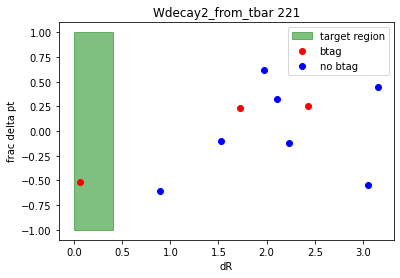

Decay product pt= 70594.328125
Jet pts= [1.13e+05, 1.09e+05, 1.07e+05, 7.88e+04, ... 5.25e+04, 4.75e+04, 3.89e+04, 2.7e+04]
Decay product phi= 2.255047559738159
Jet phis= [2.24, -1.42, 2.3, 0.35, 2.05, -2.49, -1.96, -2.1, -0.128, -2.07]
Decay product eta= -0.3066358268260956
Jet etas= [-1.2, 1.27, -0.336, 0.856, 1.2, -1.09, 0.974, 0.529, 1.77, -0.476]


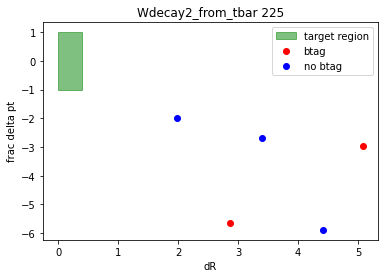

Decay product pt= 11452.68359375
Jet pts= [7.89e+04, 7.62e+04, 4.55e+04, 4.21e+04, 3.42e+04]
Decay product phi= -0.5995596051216125
Jet phis= [-0.288, 2.86, 2.26, -2.85, -1.97]
Decay product eta= -2.2228755950927734
Jet etas= [2.18, -1.7, 1.97, 0.323, -0.784]


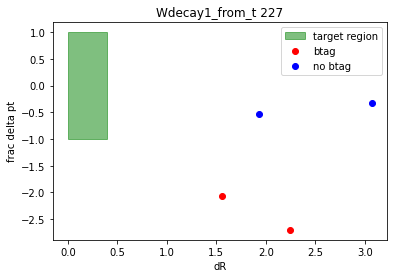

Decay product pt= 35243.58203125
Jet pts= [1.31e+05, 1.08e+05, 5.41e+04, 4.7e+04]
Decay product phi= 0.9909020066261292
Jet phis= [3.09, -0.316, 2.59, -1.98]
Decay product eta= 0.8009704351425171
Jet etas= [1.6, -0.0482, 1.89, 0.0177]


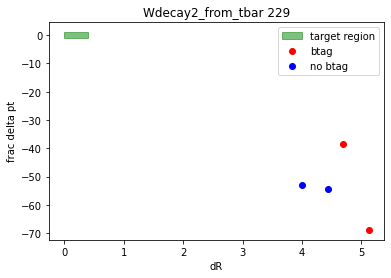

Decay product pt= 1209.854736328125
Jet pts= [8.45e+04, 6.72e+04, 6.51e+04, 4.8e+04]
Decay product phi= 1.8040339946746826
Jet phis= [-2.29, 2.79, -0.494, 1.34]
Decay product eta= 4.880190372467041
Jet etas= [0.247, 0.552, 1.61, 0.21]


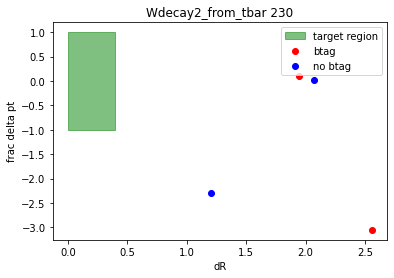

Decay product pt= 33554.01953125
Jet pts= [1.36e+05, 1.11e+05, 3.31e+04, 3.01e+04]
Decay product phi= 1.283392310142517
Jet phis= [-1.11, 2.3, 2.48, 0.368]
Decay product eta= 0.8139230608940125
Jet etas= [-0.0881, 0.183, -0.872, -0.9]


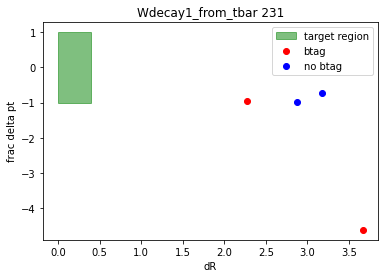

Decay product pt= 15164.091796875
Jet pts= [8.53e+04, 3.01e+04, 2.95e+04, 2.62e+04]
Decay product phi= 3.004955768585205
Jet phis= [-0.66, 1.19, -1.44, -1.14]
Decay product eta= -1.1079198122024536
Jet etas= [1.46, 1.12, 0.242, 1.24]


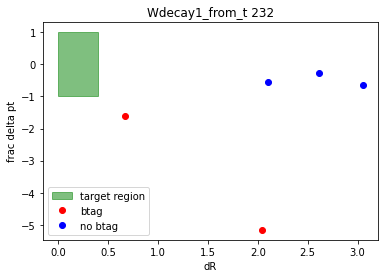

Decay product pt= 27846.9765625
Jet pts= [1.71e+05, 7.28e+04, 4.61e+04, 4.3e+04, 3.56e+04]
Decay product phi= 2.7322590351104736
Jet phis= [-1.82, 2.42, -0.248, -2.1, 1.66]
Decay product eta= 0.35932815074920654
Jet etas= [-0.732, -0.239, 1.01, -1.16, -2.03]


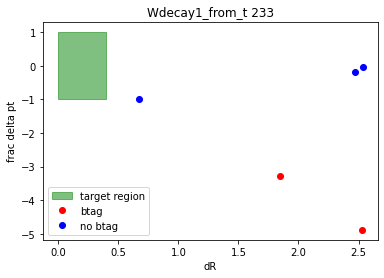

Decay product pt= 24817.80859375
Jet pts= [1.46e+05, 1.06e+05, 4.96e+04, 2.96e+04, 2.54e+04]
Decay product phi= -0.8397190570831299
Jet phis= [1.48, -1.08, -1.22, -3.02, 2.98]
Decay product eta= -2.530787944793701
Jet etas= [-1.53, -0.699, -1.97, -1.38, -1.94]


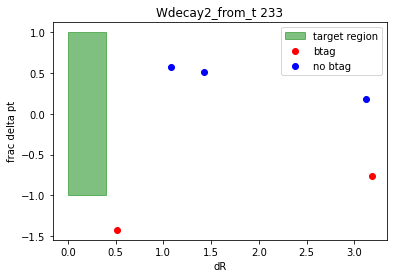

Decay product pt= 60246.0703125
Jet pts= [1.46e+05, 1.06e+05, 4.96e+04, 2.96e+04, 2.54e+04]
Decay product phi= 1.9013557434082031
Jet phis= [1.48, -1.08, -1.22, -3.02, 2.98]
Decay product eta= 0.0
Jet etas= [-1.53, -0.699, -1.97, -1.38, -1.94]


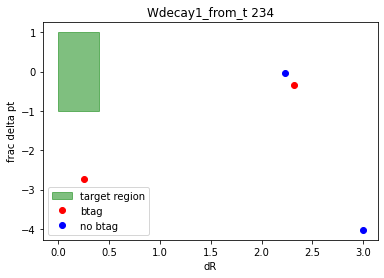

Decay product pt= 36329.53515625
Jet pts= [1.83e+05, 1.36e+05, 4.9e+04, 3.77e+04]
Decay product phi= -2.6535229682922363
Jet phis= [0.131, -2.9, -0.416, 1.58]
Decay product eta= -1.077985405921936
Jet etas= [-2.18, -1.14, -0.478, -1.96]


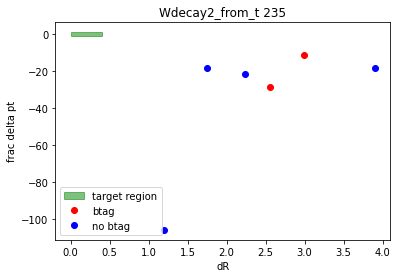

Decay product pt= 6732.2236328125
Jet pts= [7.2e+05, 2e+05, 1.54e+05, 1.29e+05, 1.29e+05, 8.13e+04]
Decay product phi= -1.661023736000061
Jet phis= [-0.937, 2.14, 2.39, -2.55, 1.02, 2.18]
Decay product eta= 0.0
Jet etas= [-0.505, 1.03, 0.632, 1.96, -2.39, 2.18]


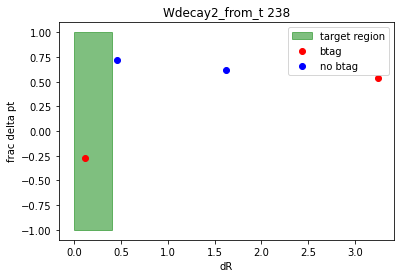

Decay product pt= 125212.7265625
Jet pts= [1.59e+05, 5.8e+04, 4.78e+04, 3.46e+04]
Decay product phi= -0.7277533411979675
Jet phis= [-0.785, 1.49, -2.25, -0.304]
Decay product eta= 0.0
Jet etas= [-0.724, 1.55, -1.39, -0.992]


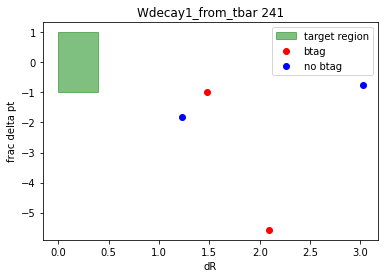

Decay product pt= 24691.521484375
Jet pts= [1.62e+05, 6.96e+04, 4.94e+04, 4.33e+04]
Decay product phi= 0.13650210201740265
Jet phis= [-1.89, 1.29, 1.62, 3.04]
Decay product eta= -0.7311685681343079
Jet etas= [-1.25, -0.305, -0.687, -1.57]


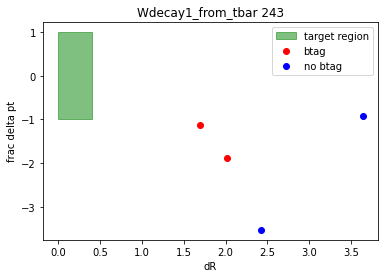

Decay product pt= 16823.0703125
Jet pts= [7.62e+04, 4.86e+04, 3.57e+04, 3.22e+04]
Decay product phi= 0.04349275305867195
Jet phis= [2.36, -1.06, -1.11, -2.64]
Decay product eta= -0.8050635457038879
Jet etas= [-0.0949, 0.876, 0.435, 1.65]


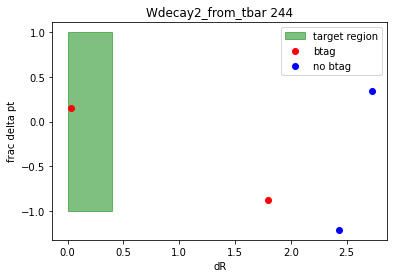

Decay product pt= 47871.21875
Jet pts= [1.06e+05, 9.01e+04, 4.07e+04, 3.16e+04]
Decay product phi= -1.924863576889038
Jet phis= [0.505, 2.69, -1.91, 1.69]
Decay product eta= -0.29640355706214905
Jet etas= [-0.179, 0.372, -0.32, -0.868]


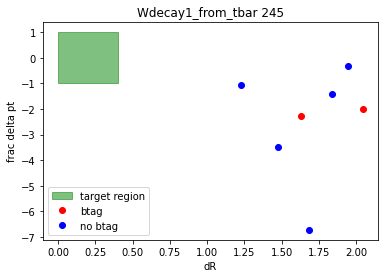

Decay product pt= 24291.146484375
Jet pts= [1.88e+05, 1.09e+05, 7.91e+04, 7.32e+04, 5.89e+04, 4.98e+04, 3.17e+04]
Decay product phi= 2.15541672706604
Jet phis= [0.985, 2.41, -2.53, 0.157, 1.36, 3.03, 0.411]
Decay product eta= 0.4700096845626831
Jet etas= [-0.743, 1.93, 0.154, 0.903, 2.12, 1.33, 1.33]


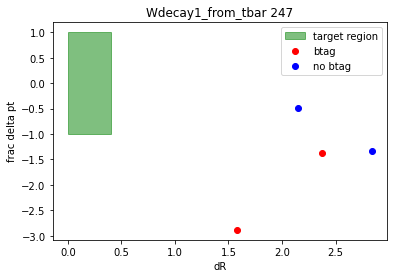

Decay product pt= 26279.142578125
Jet pts= [1.02e+05, 6.22e+04, 6.12e+04, 3.94e+04]
Decay product phi= 2.7480645179748535
Jet phis= [-2.24, 1.92, -0.768, 0.864]
Decay product eta= 2.12868070602417
Jet etas= [1.23, -0.0991, 1.48, 1.1]


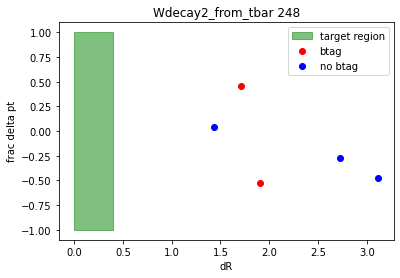

Decay product pt= 59730.453125
Jet pts= [9.1e+04, 8.83e+04, 7.6e+04, 5.72e+04, 3.27e+04]
Decay product phi= -1.642335295677185
Jet phis= [2.89, 1.44, 1.04, -3.05, -0.697]
Decay product eta= 1.742393970489502
Jet etas= [1.01, 2.2, 2.21, 2.03, 0.314]


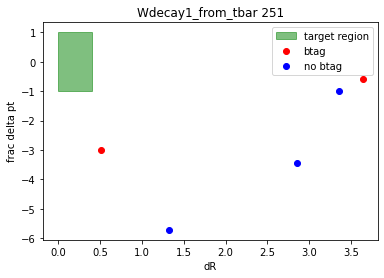

Decay product pt= 22132.662109375
Jet pts= [1.49e+05, 9.85e+04, 8.89e+04, 4.44e+04, 3.55e+04]
Decay product phi= 2.991377830505371
Jet phis= [2.08, -1.76, -2.92, 0.532, -0.149]
Decay product eta= 1.259222149848938
Jet etas= [0.297, -1.15, 0.915, -1.03, -0.576]


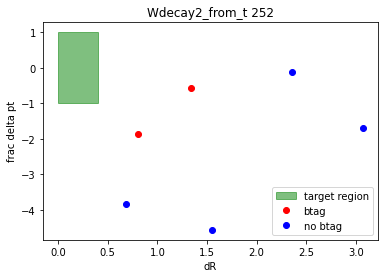

Decay product pt= 24637.40234375
Jet pts= [1.37e+05, 1.19e+05, 7.08e+04, 6.63e+04, 3.89e+04, 2.76e+04]
Decay product phi= -0.28268963098526
Jet phis= [-1.76, -0.942, -0.833, 2.36, 0.875, -2.12]
Decay product eta= 0.0
Jet etas= [-0.587, -0.282, -0.712, 1.44, 0.551, -1.6]


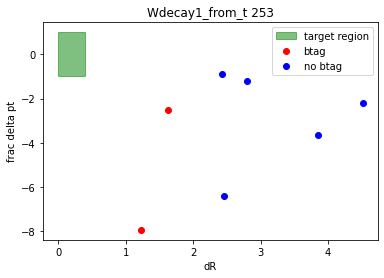

Decay product pt= 15193.8681640625
Jet pts= [1.36e+05, 1.13e+05, 7.06e+04, 5.31e+04, 4.85e+04, 3.36e+04, 2.84e+04]
Decay product phi= 1.2441065311431885
Jet phis= [1.12, -2.74, -1.13, -0.307, -1.91, -0.466, 1.79]
Decay product eta= 2.273172616958618
Jet etas= [1.06, 1.42, -0.759, 1.76, -0.977, 0.0536, -0.0982]


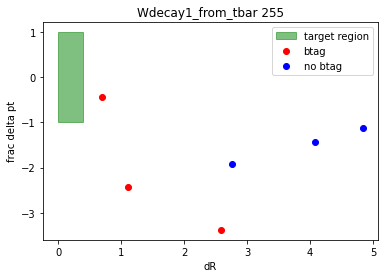

Decay product pt= 22346.69921875
Jet pts= [9.79e+04, 7.67e+04, 6.52e+04, 5.45e+04, 4.75e+04, 3.21e+04]
Decay product phi= 2.2969958782196045
Jet phis= [0.238, 2.82, -0.395, -1.4, -2.05, 2.35]
Decay product eta= -2.0238213539123535
Jet etas= [-0.472, -1.05, -1.39, 1.13, 2.41, -1.33]


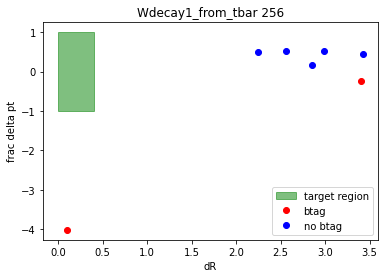

Decay product pt= 58307.44140625
Jet pts= [2.93e+05, 7.24e+04, 4.9e+04, 3.21e+04, 2.96e+04, 2.84e+04, 2.7e+04]
Decay product phi= -1.3610907793045044
Jet phis= [-1.29, 1.88, 2.32, 1.43, 0.309, 1.59, 2.36]
Decay product eta= -0.8403944969177246
Jet etas= [-0.773, 0.675, 0.329, 1.14, -2.34, -0.396, -0.759]


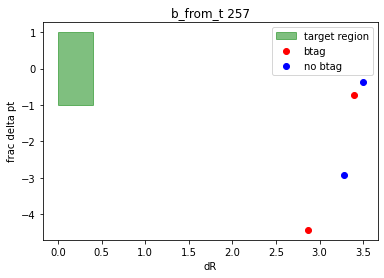

Decay product pt= 18965.399205268826
Jet pts= [1.03e+05, 7.42e+04, 3.27e+04, 2.57e+04]
Decay product phi= 1.8637488670455866
Jet phis= [-2.06, -1.33, -0.71, -1.37]
Decay product eta= 1.1592407240668325
Jet etas= [-0.471, 0.0351, -1.05, -0.553]


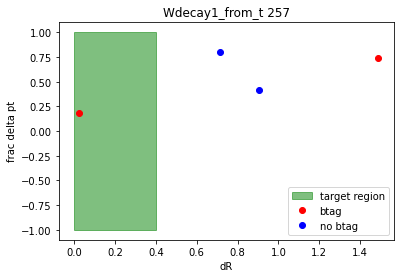

Decay product pt= 126362.6015625
Jet pts= [1.03e+05, 7.42e+04, 3.27e+04, 2.57e+04]
Decay product phi= -2.0817346572875977
Jet phis= [-2.06, -1.33, -0.71, -1.37]
Decay product eta= -0.47338995337486267
Jet etas= [-0.471, 0.0351, -1.05, -0.553]


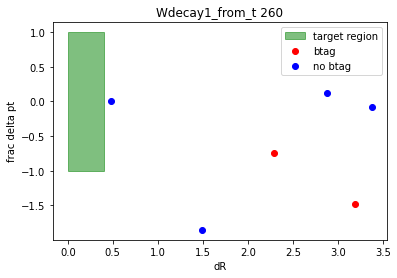

Decay product pt= 36769.25390625
Jet pts= [1.05e+05, 9.14e+04, 6.39e+04, 3.95e+04, 3.66e+04, 3.25e+04]
Decay product phi= -2.7519285678863525
Jet phis= [2.04, -0.426, 1.73, -1.03, 3.1, 0.128]
Decay product eta= 0.8044040203094482
Jet etas= [0.714, -1.38, -0.608, -2.11, 0.586, 0.948]


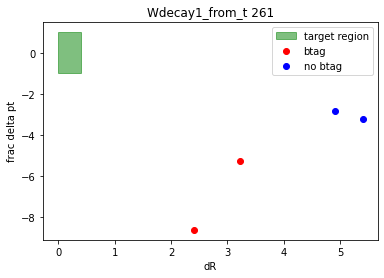

Decay product pt= 11060.2001953125
Jet pts= [1.06e+05, 6.94e+04, 4.65e+04, 4.26e+04]
Decay product phi= -2.270906686782837
Jet phis= [-2.82, 2.1, -1.72, -2.13]
Decay product eta= 3.544600009918213
Jet etas= [1.2, 0.953, -1.82, -1.37]


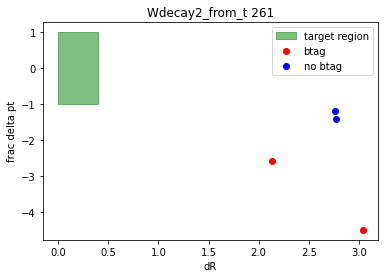

Decay product pt= 19348.8125
Jet pts= [1.06e+05, 6.94e+04, 4.65e+04, 4.26e+04]
Decay product phi= 0.0731644257903099
Jet phis= [-2.82, 2.1, -1.72, -2.13]
Decay product eta= 0.0
Jet etas= [1.2, 0.953, -1.82, -1.37]


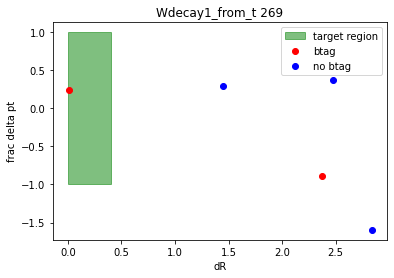

Decay product pt= 48002.51171875
Jet pts= [1.25e+05, 9.05e+04, 3.67e+04, 3.36e+04, 3.03e+04]
Decay product phi= 1.7532477378845215
Jet phis= [-0.328, -2.38, 1.75, -3.09, 2.48]
Decay product eta= -0.41109830141067505
Jet etas= [1.52, 0.577, -0.423, -0.531, 1.95]


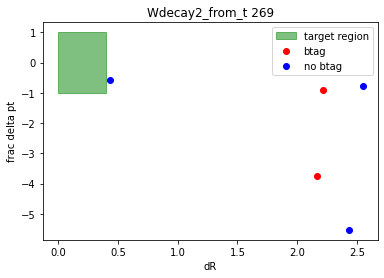

Decay product pt= 19087.31640625
Jet pts= [1.25e+05, 9.05e+04, 3.67e+04, 3.36e+04, 3.03e+04]
Decay product phi= 2.0935797691345215
Jet phis= [-0.328, -2.38, 1.75, -3.09, 2.48]
Decay product eta= 0.0
Jet etas= [1.52, 0.577, -0.423, -0.531, 1.95]


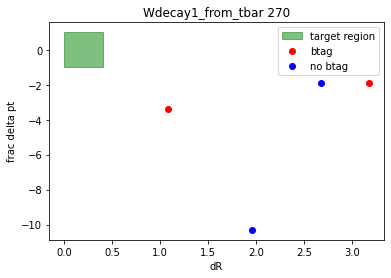

Decay product pt= 18889.751953125
Jet pts= [2.14e+05, 8.34e+04, 5.52e+04, 5.47e+04]
Decay product phi= 1.3294963836669922
Jet phis= [-0.0642, 2.41, -1.72, -2.5]
Decay product eta= 2.2800891399383545
Jet etas= [0.915, 2.32, 1.41, 1.23]


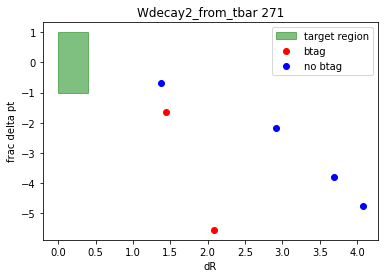

Decay product pt= 21962.484375
Jet pts= [1.44e+05, 1.27e+05, 1.06e+05, 6.94e+04, 5.78e+04, 3.68e+04]
Decay product phi= -0.5026240944862366
Jet phis= [-2.52, 2.84, 2.04, 2.36, -0.13, -0.654]
Decay product eta= -0.45374181866645813
Jet etas= [0.0517, 2.37, 2.21, 0.125, 0.944, 0.913]


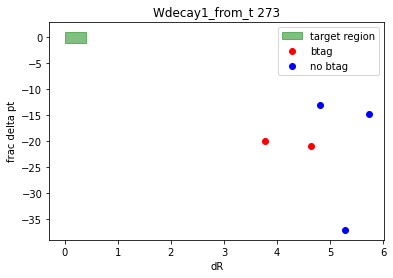

Decay product pt= 2498.926025390625
Jet pts= [9.52e+04, 5.46e+04, 5.26e+04, 3.92e+04, 3.49e+04]
Decay product phi= 0.32713526487350464
Jet phis= [-1.94, -0.874, -3.05, 0.146, -3.1]
Decay product eta= 3.382024049758911
Jet etas= [-1.38, -1.1, 0.979, -2.34, -0.481]


KeyboardInterrupt: 

In [44]:
# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})

# Define some helpful ranges
had_range = list(range(1,9))+list(range(-8,0))                     # Quarks have pdgid 1 to 8 (negatives indicate antiparticles)
lep_range = list(range(11,19))+list(range(-18,10))                 # Leptons have pdgid 11 to 18
bos_range = list(range(21,26))+list(range(-25,20))+[9,37,-9,-37]   # Bosons have pdgid 21 to 25, and 9, and 37


for i in df_notall['Event']:



     # Calculate the jet vectors for this event, as well as get the btags
    jet_vectors = vector.array({"pt":reco_tree04['jet_pt'][i],"eta":reco_tree04['jet_eta'][i],"phi":reco_tree04['jet_phi'][i],"E":reco_tree04['jet_e'][i]})
    jet_btags = np.array(reco_tree04['jet_btagged'][i])

    particle_dict = {'b_from_t':{'dRs':jet_vectors.deltaR(b_from_t_vec[i]),'frac_delta_pts':((b_from_t_vec[i].pt - jet_vectors.pt)/b_from_t_vec[i].pt)},'b_from_tbar':{'dRs':jet_vectors.deltaR(b_from_tbar_vec[i]),'frac_delta_pts':((b_from_tbar_vec[i].pt - jet_vectors.pt)/b_from_tbar_vec[i].pt)}}
    if parton_tree04['MC_Wdecay1_from_t_afterFSR_pdgid'][i] in had_range or parton_tree04['MC_Wdecay2_from_t_afterFSR_pdgid'][i] in had_range:
        particle_dict['Wdecay1_from_t'] = {'dRs':jet_vectors.deltaR(Wdecay1_from_t_vec[i]),'frac_delta_pts':((Wdecay1_from_t_vec[i].pt - jet_vectors.pt)/Wdecay1_from_t_vec[i].pt)}
        particle_dict['Wdecay2_from_t'] = {'dRs':jet_vectors.deltaR(Wdecay2_from_t_vec[i]),'frac_delta_pts':((Wdecay2_from_t_vec[i].pt - jet_vectors.pt)/Wdecay2_from_t_vec[i].pt)}
    elif parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pdgid'][i] in had_range or parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pdgid'][i] in had_range:
        particle_dict['Wdecay1_from_tbar'] = {'dRs':jet_vectors.deltaR(Wdecay1_from_tbar_vec[i]),'frac_delta_pts':((Wdecay1_from_tbar_vec[i].pt - jet_vectors.pt)/Wdecay1_from_tbar_vec[i].pt)}
        particle_dict['Wdecay2_from_tbar'] = {'dRs':jet_vectors.deltaR(Wdecay2_from_tbar_vec[i]),'frac_delta_pts':((Wdecay2_from_tbar_vec[i].pt - jet_vectors.pt)/Wdecay2_from_tbar_vec[i].pt)}
    else:
        print('WARNING: none of the W decays in event %d seem to be jets! What?!' % i)
        print('pdgids: %d, %d, %d, %d' % (parton_tree04['MC_Wdecay1_from_t_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay2_from_t_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pdgid'][i] ,parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pdgid'][i] ))


    for par in particle_dict:

        if par not in df_notall[df_notall['Event']==i]['Parent'].to_list()[0]:

            dR_points_btag = []
            dR_points_nobtag = []
            pt_points_btag = []
            pt_points_nobtag = []

            for j in range(len(particle_dict[par]['dRs'])):
                if jet_btags[j]==1:
                    dR_points_btag.append(particle_dict[par]['dRs'][j])
                    pt_points_btag.append(particle_dict[par]['frac_delta_pts'][j])
                elif jet_btags[j]==0:
                    dR_points_nobtag.append(particle_dict[par]['dRs'][j])
                    pt_points_nobtag.append(particle_dict[par]['frac_delta_pts'][j])

            plt.figure(par+' '+str(i))
            plt.title(par+' '+str(i))

            rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
            plt.gca().add_patch(rect1)  # gca = 'grab current axis
            plt.plot(dR_points_btag,pt_points_btag,'ro',label='btag')
            plt.plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')

            plt.legend()
            plt.xlabel('dR')
            plt.ylabel('frac delta pt')
            plt.show()

            print('Decay product pt=',parton_tree04['MC_'+par+'_afterFSR_pt'][i])
            print('Jet pts=',reco_tree04['jet_pt'][i])

            print('Decay product phi=',parton_tree04['MC_'+par+'_afterFSR_phi'][i])
            print('Jet phis=',reco_tree04['jet_phi'][i])

            print('Decay product eta=',parton_tree04['MC_'+par+'_afterFSR_eta'][i])
            print('Jet etas=',reco_tree04['jet_eta'][i])
        

    

In [15]:
# Calculate particle vectors
b_from_t_vec = vector.array({"pt":parton_tree04['MC_b_from_t_afterFSR_pt'],"eta":parton_tree04['MC_b_from_t_afterFSR_eta'],"phi":parton_tree04['MC_b_from_t_afterFSR_phi'],"E":parton_tree04['MC_b_from_t_afterFSR_E']})
b_from_tbar_vec = vector.array({"pt":parton_tree04['MC_b_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_b_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_b_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_b_from_tbar_afterFSR_E']})
Wdecay1_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_t_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_t_afterFSR_E']})
Wdecay2_from_t_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_t_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_t_afterFSR_y'],"phi":parton_tree04['MC_Wdecay2_from_t_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_t_afterFSR_E']})   # Approx eta with y for now, since eta empty
Wdecay1_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay1_from_tbar_afterFSR_E']})
Wdecay2_from_tbar_vec = vector.array({"pt":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_pt'],"eta":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_eta'],"phi":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_phi'],"E":parton_tree04['MC_Wdecay2_from_tbar_afterFSR_E']})


for i,event in enumerate(list(df04_bad['Event'])):

    dR_points_btag = []
    dR_points_nobtag = []
    pt_points_btag = []
    pt_points_nobtag = []

    min_dR = 100000
    and_the_pt = 0

    plot = True


    par = list(df04_bad['Parent'])[i]

    if par=='b_from_t':
        par_vec=b_from_t_vec[event]
    elif par=='b_from_tbar':
        par_vec=b_from_tbar_vec[event]
    elif par=='Wdecay1_from_t':
        continue
        par_vec=Wdecay1_from_t_vec[event]
    elif par=='Wdecay2_from_t':
        continue
        par_vec=Wdecay2_from_t_vec[event]
    elif par=='Wdecay1_from_tbar':
        continue
        par_vec=Wdecay1_from_tbar_vec[event]
    elif par=='Wdecay2_from_tbar':
        continue
        par_vec=Wdecay2_from_tbar_vec[event]


    for j in range(int(reco_tree04['jet_n'][event])):
        jet_vec = vector.obj(pt=reco_tree04['jet_pt'][event][j],eta=reco_tree04['jet_eta'][event][j],phi=reco_tree04['jet_phi'][event][j],E=reco_tree04['jet_e'][event][j])
        this_dR = par_vec.deltaR(jet_vec)
        this_pt = (par_vec.pt-jet_vec.pt)/par_vec.pt
        
        if reco_tree04['jet_btagged'][event][j]==1:
            dR_points_btag.append(this_dR)
            pt_points_btag.append(this_pt)
        else:
            dR_points_nobtag.append(this_dR)
            pt_points_nobtag.append(this_pt)

        if this_dR < 0.4 and this_pt > -1:
            plot = True


    if plot==True:


        plt.figure(str(event))
        plt.title(str(event)+' '+par)

        rect1 = matplotlib.patches.Rectangle((0,-1), 0.4, 2, color='green',alpha=0.5,label='target region')
        plt.gca().add_patch(rect1)  # gca = 'grab current axis
        plt.plot([list(df04_bad['dR'])[i]],[list(df04_bad['frac delta pt'])[i]],'y*',markersize=15,label='chosen')
        plt.plot(dR_points_btag,pt_points_btag,'ro',label='btag')
        plt.plot(dR_points_nobtag,pt_points_nobtag,'bo',label='no btag')

        plt.legend()
        plt.xlabel('dR')
        plt.ylabel('frac delta pt')
        plt.show()

SyntaxError: invalid syntax (3438349472.py, line 51)